In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


db_name = '../data/feedback_log.db'
# Database connection
conn = sqlite3.connect(db_name)

In [2]:
# Load data into DataFrame
query = "SELECT * FROM feedback"
df = pd.read_sql_query(query, conn)
df

,id,timestamp,name,code,expert,model_name,model_index,prompt_index,prompt_detail,comparison,feedback,satisfaction,response_a,response_b,action
0,1,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,1.0,Is high intensity interval training only for h...,A is better,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,base,INSERTED
1,2,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,2.0,What is fitness age and is it relevant for me?,B is better,B is better for den er mer konkret – men ikke ...,4.0,base,finetuned,INSERTED
2,3,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,B kanskje noe bedre for hvorfor det er viktig ...,4.0,base,finetuned,INSERTED
3,4,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,1.0,Is high intensity interval training only for h...,B is better,None,5.0,base,finetuned,INSERTED
4,5,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,2.0,What is fitness age and is it relevant for me?,B is better,B er klart best men det med muscle strenght os...,4.0,base,finetuned,INSERTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,309,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED
309,310,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,None,4.0,base,finetuned,INSERTED
310,311,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,1.0,Is high intensity interval training only for h...,A is better,None,3.0,finetuned,base,INSERTED
311,312,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED


In [3]:
query = "DELETE FROM feedback WHERE id NOT IN ( SELECT MIN(id) FROM feedback GROUP BY timestamp, name, code, expert, model_name, model_index, prompt_index, prompt_detail, comparison, feedback, satisfaction, response_a, response_b, action)"
conn.execute(query)

In [4]:
# Load data into DataFrame
query = "SELECT * FROM feedback"
df = pd.read_sql_query(query, conn)
df

,id,timestamp,name,code,expert,model_name,model_index,prompt_index,prompt_detail,comparison,feedback,satisfaction,response_a,response_b,action
0,1,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,1.0,Is high intensity interval training only for h...,A is better,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,base,INSERTED
1,2,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,2.0,What is fitness age and is it relevant for me?,B is better,B is better for den er mer konkret – men ikke ...,4.0,base,finetuned,INSERTED
2,3,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,B kanskje noe bedre for hvorfor det er viktig ...,4.0,base,finetuned,INSERTED
3,4,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,1.0,Is high intensity interval training only for h...,B is better,None,5.0,base,finetuned,INSERTED
4,5,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,2.0,What is fitness age and is it relevant for me?,B is better,B er klart best men det med muscle strenght os...,4.0,base,finetuned,INSERTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,309,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED
273,310,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,None,4.0,base,finetuned,INSERTED
274,311,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,1.0,Is high intensity interval training only for h...,A is better,None,3.0,finetuned,base,INSERTED
275,312,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED


In [5]:
# count unique code in that said "" Yes, I am an expert." in the df
yes_expert_counts = df[df['expert'] == 'Yes, I am an expert.'].groupby('code').size()
some_what_counts = df[df['expert'] == 'Somewhat, I have some knowledge.'].groupby('code').size()
not_expert_counts = df[df['expert'] == 'No, I have no expertise.'].groupby('code').size()
len(yes_expert_counts), len(some_what_counts), len(not_expert_counts)

(7, 2, 7)

In [6]:
# count unique code in the df
unique_codes = df['code'].unique()
len(unique_codes)


17

In [7]:
# select all records where code, model_name, model_index, prompt_index are unique and if action has inserted values and updated values pick the updated values

# code_6PF = df[df['code'] == '6PF']
# code_6PF = code_6PF.drop_duplicates(['code','model_name','model_index','prompt_index'], keep='last')
# code_6PF

In [8]:
# Select all df where code is equal to 6PF
# code_6PF = df[df['code'] == '6PF']
# code_6PF

In [9]:
# count how many responses were made by each code, of expert

response_counts = df.groupby('code').size()
response_counts

code
212     3
22T     9
27D    18
2ZE    22
6PF    36
7WV    15
ADI    15
ASO    15
E1B    18
ITE    15
K7G    15
KOG    18
LTF    26
TKK    15
WUG    18
ZRG    18
dtype: int64

In [10]:
# count how many reponse made by each df[df['expert'] == 'Yes, I am an expert.'].groupby('code').size()
yes_expert_response_counts = df[df['expert'] == 'Yes, I am an expert.'].groupby('code').size()
yes_expert_response_counts

code
212     3
6PF    36
ITE    15
K7G    15
TKK    15
WUG    18
ZRG    18
dtype: int64

In [11]:
# count how many reponse made by each df[df['expert'] == ''Somewhat, I have some knowledge.'].groupby('code').size()
some_what_expert_response_counts = df[df['expert'] == 'Somewhat, I have some knowledge.'].groupby('code').size()
some_what_expert_response_counts

code
22T     9
ASO    15
dtype: int64

In [12]:
# count how many reponse made by each df[df['expert'] == 'No, I have no expertise.'].groupby('code').size()
not_expert_response_counts = df[df['expert'] == 'No, I have no expertise.'].groupby('code').size()
not_expert_response_counts

code
27D    18
2ZE    22
7WV    15
ADI    15
E1B    18
KOG    18
LTF    26
dtype: int64

In [13]:
# take only the unique values of code with last response (when user updated his response0
df = df.drop_duplicates(['code','model_name','model_index','prompt_index'], keep='last')
df


,id,timestamp,name,code,expert,model_name,model_index,prompt_index,prompt_detail,comparison,feedback,satisfaction,response_a,response_b,action
0,1,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,1.0,Is high intensity interval training only for h...,A is better,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,base,INSERTED
1,2,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,2.0,What is fitness age and is it relevant for me?,B is better,B is better for den er mer konkret – men ikke ...,4.0,base,finetuned,INSERTED
2,3,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,B kanskje noe bedre for hvorfor det er viktig ...,4.0,base,finetuned,INSERTED
3,4,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,1.0,Is high intensity interval training only for h...,B is better,None,5.0,base,finetuned,INSERTED
4,5,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,2.0,What is fitness age and is it relevant for me?,B is better,B er klart best men det med muscle strenght os...,4.0,base,finetuned,INSERTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,309,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED
273,310,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,None,4.0,base,finetuned,INSERTED
274,311,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,1.0,Is high intensity interval training only for h...,A is better,None,3.0,finetuned,base,INSERTED
275,312,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED


In [14]:

# take only values for unique code count is 15 responses
df = df.groupby('code').filter(lambda x: len(x) == 15)
df

,id,timestamp,name,code,expert,model_name,model_index,prompt_index,prompt_detail,comparison,feedback,satisfaction,response_a,response_b,action
0,1,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,1.0,Is high intensity interval training only for h...,A is better,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,base,INSERTED
1,2,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,2.0,What is fitness age and is it relevant for me?,B is better,B is better for den er mer konkret – men ikke ...,4.0,base,finetuned,INSERTED
2,3,07:58.7,None,ITE,"Yes, I am an expert.",Llama-2 13B,0.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,B kanskje noe bedre for hvorfor det er viktig ...,4.0,base,finetuned,INSERTED
3,4,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,1.0,Is high intensity interval training only for h...,B is better,None,5.0,base,finetuned,INSERTED
4,5,15:36.0,None,ITE,"Yes, I am an expert.",Mixtral 8*7B,1.0,2.0,What is fitness age and is it relevant for me?,B is better,B er klart best men det med muscle strenght os...,4.0,base,finetuned,INSERTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,309,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED
273,310,40:01.8,None,ADI,"No, I have no expertise.",Mistral 7B v2,3.0,3.0,"What is cardiorespiratory fitness, and why doe...",B is better,None,4.0,base,finetuned,INSERTED
274,311,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,1.0,Is high intensity interval training only for h...,A is better,None,3.0,finetuned,base,INSERTED
275,312,50:06.9,None,ADI,"No, I have no expertise.",StableBeluga 7B,4.0,2.0,What is fitness age and is it relevant for me?,B is better,None,4.0,base,finetuned,INSERTED


In [15]:
# create a column based on comparison column, if comparison is 'A is better' then check resonponse_a value and assign it to the comparison column, and if comparison is 'B is better' then check resonponse_b value and assign it to the comparison column
df['better_response_choise'] = df.apply(lambda x: x['response_a'] if x['comparison'] == 'A is better' else x['response_b'], axis=1)

# delete name, model_index, prompt_index, comparison, response_a, response_b, and action columns
df = df.drop(['id', 'timestamp', 'name','model_index','prompt_index','comparison','response_a','response_b','action'], axis=1)

df

,code,expert,model_name,prompt_detail,feedback,satisfaction,better_response_choise
0,ITE,"Yes, I am an expert.",Llama-2 13B,Is high intensity interval training only for h...,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned
1,ITE,"Yes, I am an expert.",Llama-2 13B,What is fitness age and is it relevant for me?,B is better for den er mer konkret – men ikke ...,4.0,finetuned
2,ITE,"Yes, I am an expert.",Llama-2 13B,"What is cardiorespiratory fitness, and why doe...",B kanskje noe bedre for hvorfor det er viktig ...,4.0,finetuned
3,ITE,"Yes, I am an expert.",Mixtral 8*7B,Is high intensity interval training only for h...,None,5.0,finetuned
4,ITE,"Yes, I am an expert.",Mixtral 8*7B,What is fitness age and is it relevant for me?,B er klart best men det med muscle strenght os...,4.0,finetuned
...,...,...,...,...,...,...,...
272,ADI,"No, I have no expertise.",Mistral 7B v2,What is fitness age and is it relevant for me?,None,4.0,finetuned
273,ADI,"No, I have no expertise.",Mistral 7B v2,"What is cardiorespiratory fitness, and why doe...",None,4.0,finetuned
274,ADI,"No, I have no expertise.",StableBeluga 7B,Is high intensity interval training only for h...,None,3.0,finetuned
275,ADI,"No, I have no expertise.",StableBeluga 7B,What is fitness age and is it relevant for me?,None,4.0,finetuned


In [16]:
# count how many responses were made by each code, of expert

response_counts = df.groupby('code').size()
response_counts

code
2ZE    15
6PF    15
7WV    15
ADI    15
ASO    15
E1B    15
ITE    15
K7G    15
KOG    15
LTF    15
TKK    15
WUG    15
ZRG    15
dtype: int64

In [17]:
# count how many reponse made by each df[df['expert'] == 'Yes, I am an expert.'].groupby('code').size()
yes_expert_response_counts = df[df['expert'] == 'Yes, I am an expert.'].groupby('code').size()
yes_expert_response_counts

code
6PF    15
ITE    15
K7G    15
TKK    15
WUG    15
ZRG    15
dtype: int64

In [18]:
# count how many reponse made by each df[df['expert'] == ''Somewhat, I have some knowledge.'].groupby('code').size()
some_what_expert_response_counts = df[df['expert'] == 'Somewhat, I have some knowledge.'].groupby('code').size()
some_what_expert_response_counts

code
ASO    15
dtype: int64

In [19]:
# count how many reponse made by each df[df['expert'] == 'No, I have no expertise.'].groupby('code').size()
not_expert_response_counts = df[df['expert'] == 'No, I have no expertise.'].groupby('code').size()
not_expert_response_counts

code
2ZE    15
7WV    15
ADI    15
E1B    15
KOG    15
LTF    15
dtype: int64

In [20]:
len(df)

195

In [21]:
df_expert = df[df['expert'] == 'Yes, I am an expert.']
df_expert

,code,expert,model_name,prompt_detail,feedback,satisfaction,better_response_choise
0,ITE,"Yes, I am an expert.",Llama-2 13B,Is high intensity interval training only for h...,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned
1,ITE,"Yes, I am an expert.",Llama-2 13B,What is fitness age and is it relevant for me?,B is better for den er mer konkret – men ikke ...,4.0,finetuned
2,ITE,"Yes, I am an expert.",Llama-2 13B,"What is cardiorespiratory fitness, and why doe...",B kanskje noe bedre for hvorfor det er viktig ...,4.0,finetuned
3,ITE,"Yes, I am an expert.",Mixtral 8*7B,Is high intensity interval training only for h...,None,5.0,finetuned
4,ITE,"Yes, I am an expert.",Mixtral 8*7B,What is fitness age and is it relevant for me?,B er klart best men det med muscle strenght os...,4.0,finetuned
...,...,...,...,...,...,...,...
139,K7G,"Yes, I am an expert.",Mistral 7B v2,What is fitness age and is it relevant for me?,None,4.0,finetuned
140,K7G,"Yes, I am an expert.",Mistral 7B v2,"What is cardiorespiratory fitness, and why doe...",None,4.0,finetuned
141,K7G,"Yes, I am an expert.",StableBeluga 7B,Is high intensity interval training only for h...,None,4.0,base
142,K7G,"Yes, I am an expert.",StableBeluga 7B,What is fitness age and is it relevant for me?,None,3.0,finetuned


In [22]:
# count number of comparison column when A is better if response_a is equal to finetuned for unique model_name, model_index,prompt_index, prompt_detail values
df_expert_comparison = df_expert[df_expert['better_response_choise'] == 'finetuned'].groupby(['model_name', 'prompt_detail']).size()
df_expert_comparison

model_name       prompt_detail                                                      
LLama-3 8B       Is high intensity interval training only for healthy individuals?      2
                 What is cardiorespiratory fitness, and why does that matter for me?    3
                 What is fitness age and is it relevant for me?                         3
Llama-2 13B      Is high intensity interval training only for healthy individuals?      3
                 What is cardiorespiratory fitness, and why does that matter for me?    5
                 What is fitness age and is it relevant for me?                         6
Mistral 7B v2    Is high intensity interval training only for healthy individuals?      4
                 What is cardiorespiratory fitness, and why does that matter for me?    4
                 What is fitness age and is it relevant for me?                         6
Mixtral 8*7B     Is high intensity interval training only for healthy individuals?      6
               

In [23]:
# count number of comparison column when A is better if response_a is equal to finetuned for unique prompt_index, prompt_detail values
df_expert_comparison_prompt = df_expert[df_expert['better_response_choise'] == 'finetuned'].groupby(['prompt_detail']).size()
df_expert_comparison_prompt

prompt_detail
Is high intensity interval training only for healthy individuals?      16
What is cardiorespiratory fitness, and why does that matter for me?    19
What is fitness age and is it relevant for me?                         26
dtype: int64

### Add sentiment to the table base on the feedback column

In [24]:
from textblob import TextBlob

# Define a function to calculate sentiment based on feedback
def calculate_sentiment(feedback):
    if pd.isna(feedback):
        return 0  # Neutral sentiment for missing feedback
    analysis = TextBlob(feedback)
    if analysis.sentiment.polarity > 0:
        return 1  # Positive sentiment
    elif analysis.sentiment.polarity < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply the sentiment calculation to the feedback column
df['sentiment'] = df['feedback'].apply(calculate_sentiment)

# Display the first few rows to check the sentiment values
df[['feedback', 'sentiment']].head()

,feedback,sentiment
0,"Svar B er ikke veldig bra... For example, indi...",1
1,B is better for den er mer konkret – men ikke ...,1
2,B kanskje noe bedre for hvorfor det er viktig ...,0
3,None,0
4,B er klart best men det med muscle strenght os...,1


In [25]:
# Calculate the response length based on the feedback column
df['response_length'] = df['feedback'].apply(lambda x: len(str(x)))
df

,code,expert,model_name,prompt_detail,feedback,satisfaction,better_response_choise,sentiment,response_length
0,ITE,"Yes, I am an expert.",Llama-2 13B,Is high intensity interval training only for h...,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,1,539
1,ITE,"Yes, I am an expert.",Llama-2 13B,What is fitness age and is it relevant for me?,B is better for den er mer konkret – men ikke ...,4.0,finetuned,1,90
2,ITE,"Yes, I am an expert.",Llama-2 13B,"What is cardiorespiratory fitness, and why doe...",B kanskje noe bedre for hvorfor det er viktig ...,4.0,finetuned,0,226
3,ITE,"Yes, I am an expert.",Mixtral 8*7B,Is high intensity interval training only for h...,None,5.0,finetuned,0,4
4,ITE,"Yes, I am an expert.",Mixtral 8*7B,What is fitness age and is it relevant for me?,B er klart best men det med muscle strenght os...,4.0,finetuned,1,81
...,...,...,...,...,...,...,...,...,...
272,ADI,"No, I have no expertise.",Mistral 7B v2,What is fitness age and is it relevant for me?,None,4.0,finetuned,0,4
273,ADI,"No, I have no expertise.",Mistral 7B v2,"What is cardiorespiratory fitness, and why doe...",None,4.0,finetuned,0,4
274,ADI,"No, I have no expertise.",StableBeluga 7B,Is high intensity interval training only for h...,None,3.0,finetuned,0,4
275,ADI,"No, I have no expertise.",StableBeluga 7B,What is fitness age and is it relevant for me?,None,4.0,finetuned,0,4


In [26]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

# Download the necessary NLTK data
nltk.download('punkt')


# Function to handle NoneType values by replacing them with empty strings
def handle_none_type(text):
    return text if pd.notnull(text) else ""

# Function to calculate Clarity using sentence and word count
def calculate_clarity(feedback):
    feedback = handle_none_type(feedback)
    try:
        sentences = sent_tokenize(feedback)
        words = word_tokenize(feedback)
        avg_sentence_length = len(words) / len(sentences) if len(sentences) > 0 else 0
        return avg_sentence_length
    except:
        return 0

# Function to calculate Relevance using cosine similarity between feedback and prompt detail
def calculate_relevance(feedback, prompt):
    feedback = handle_none_type(feedback)
    prompt = handle_none_type(prompt)
    vectorizer = TfidfVectorizer().fit_transform([feedback, prompt])
    vectors = vectorizer.toarray()
    similarity = cosine_similarity([vectors[0]], [vectors[1]])[0][0]
    return similarity

# Apply the functions to the dataset
df['Clarity'] = df['feedback'].apply(calculate_clarity)
df['Relevance'] = df.apply(lambda row: calculate_relevance(row['feedback'], row['prompt_detail']), axis=1)

# Save or display the results
df[['feedback', 'Clarity', 'Relevance']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamzaharunamohammed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,feedback,Clarity,Relevance
0,"Svar B er ikke veldig bra... For example, indi...",49.0,0.066403
1,B is better for den er mer konkret – men ikke ...,19.0,0.109965
2,B kanskje noe bedre for hvorfor det er viktig ...,44.0,0.090124
3,None,0.0,0.000000
4,B er klart best men det med muscle strenght os...,17.0,0.000000


In [27]:
# save df to '../data/feedback_log_preprocessed.csv'
# delete rows where code = 'ASO'
df = df[df['code'] != 'ASO']
df.to_csv('../data/feedback_log_preprocessed.csv', index=False)

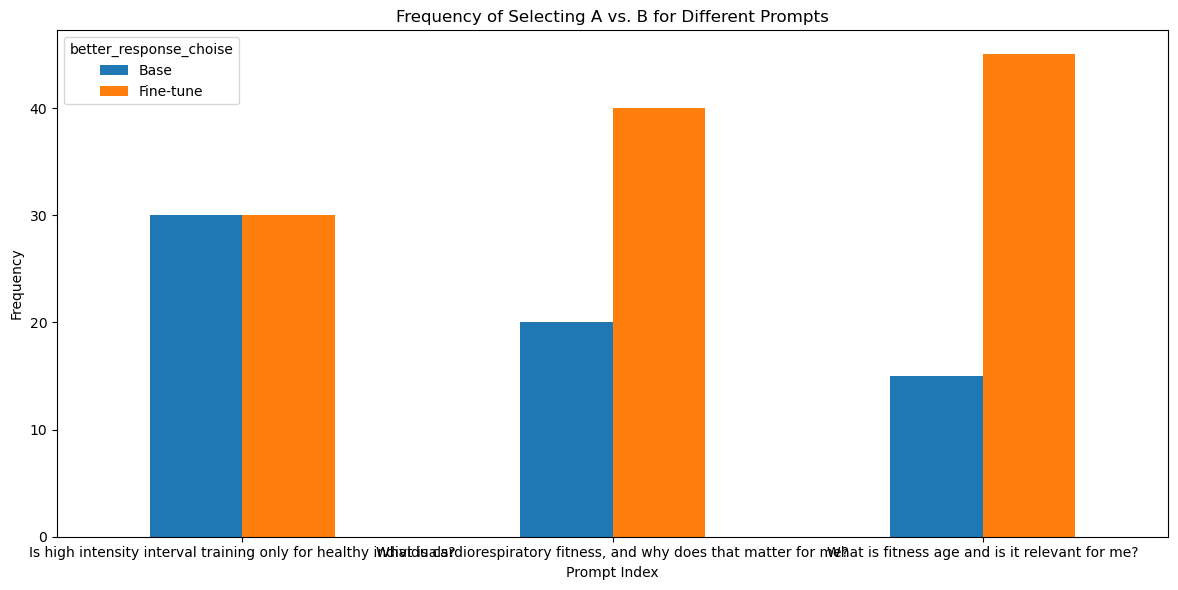

In [28]:
import matplotlib.pyplot as plt

# Count the number of times A and B were selected for better_response_choise prompt
comparison_counts = df.groupby(['prompt_detail', 'better_response_choise']).size().unstack(fill_value=0)

# Plot the bar chart
comparison_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Selecting A vs. B for Different Prompts')
plt.xlabel('Prompt Index')
plt.ylabel('Frequency')
plt.legend(title='better_response_choise', labels=['Base', 'Fine-tune'])
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


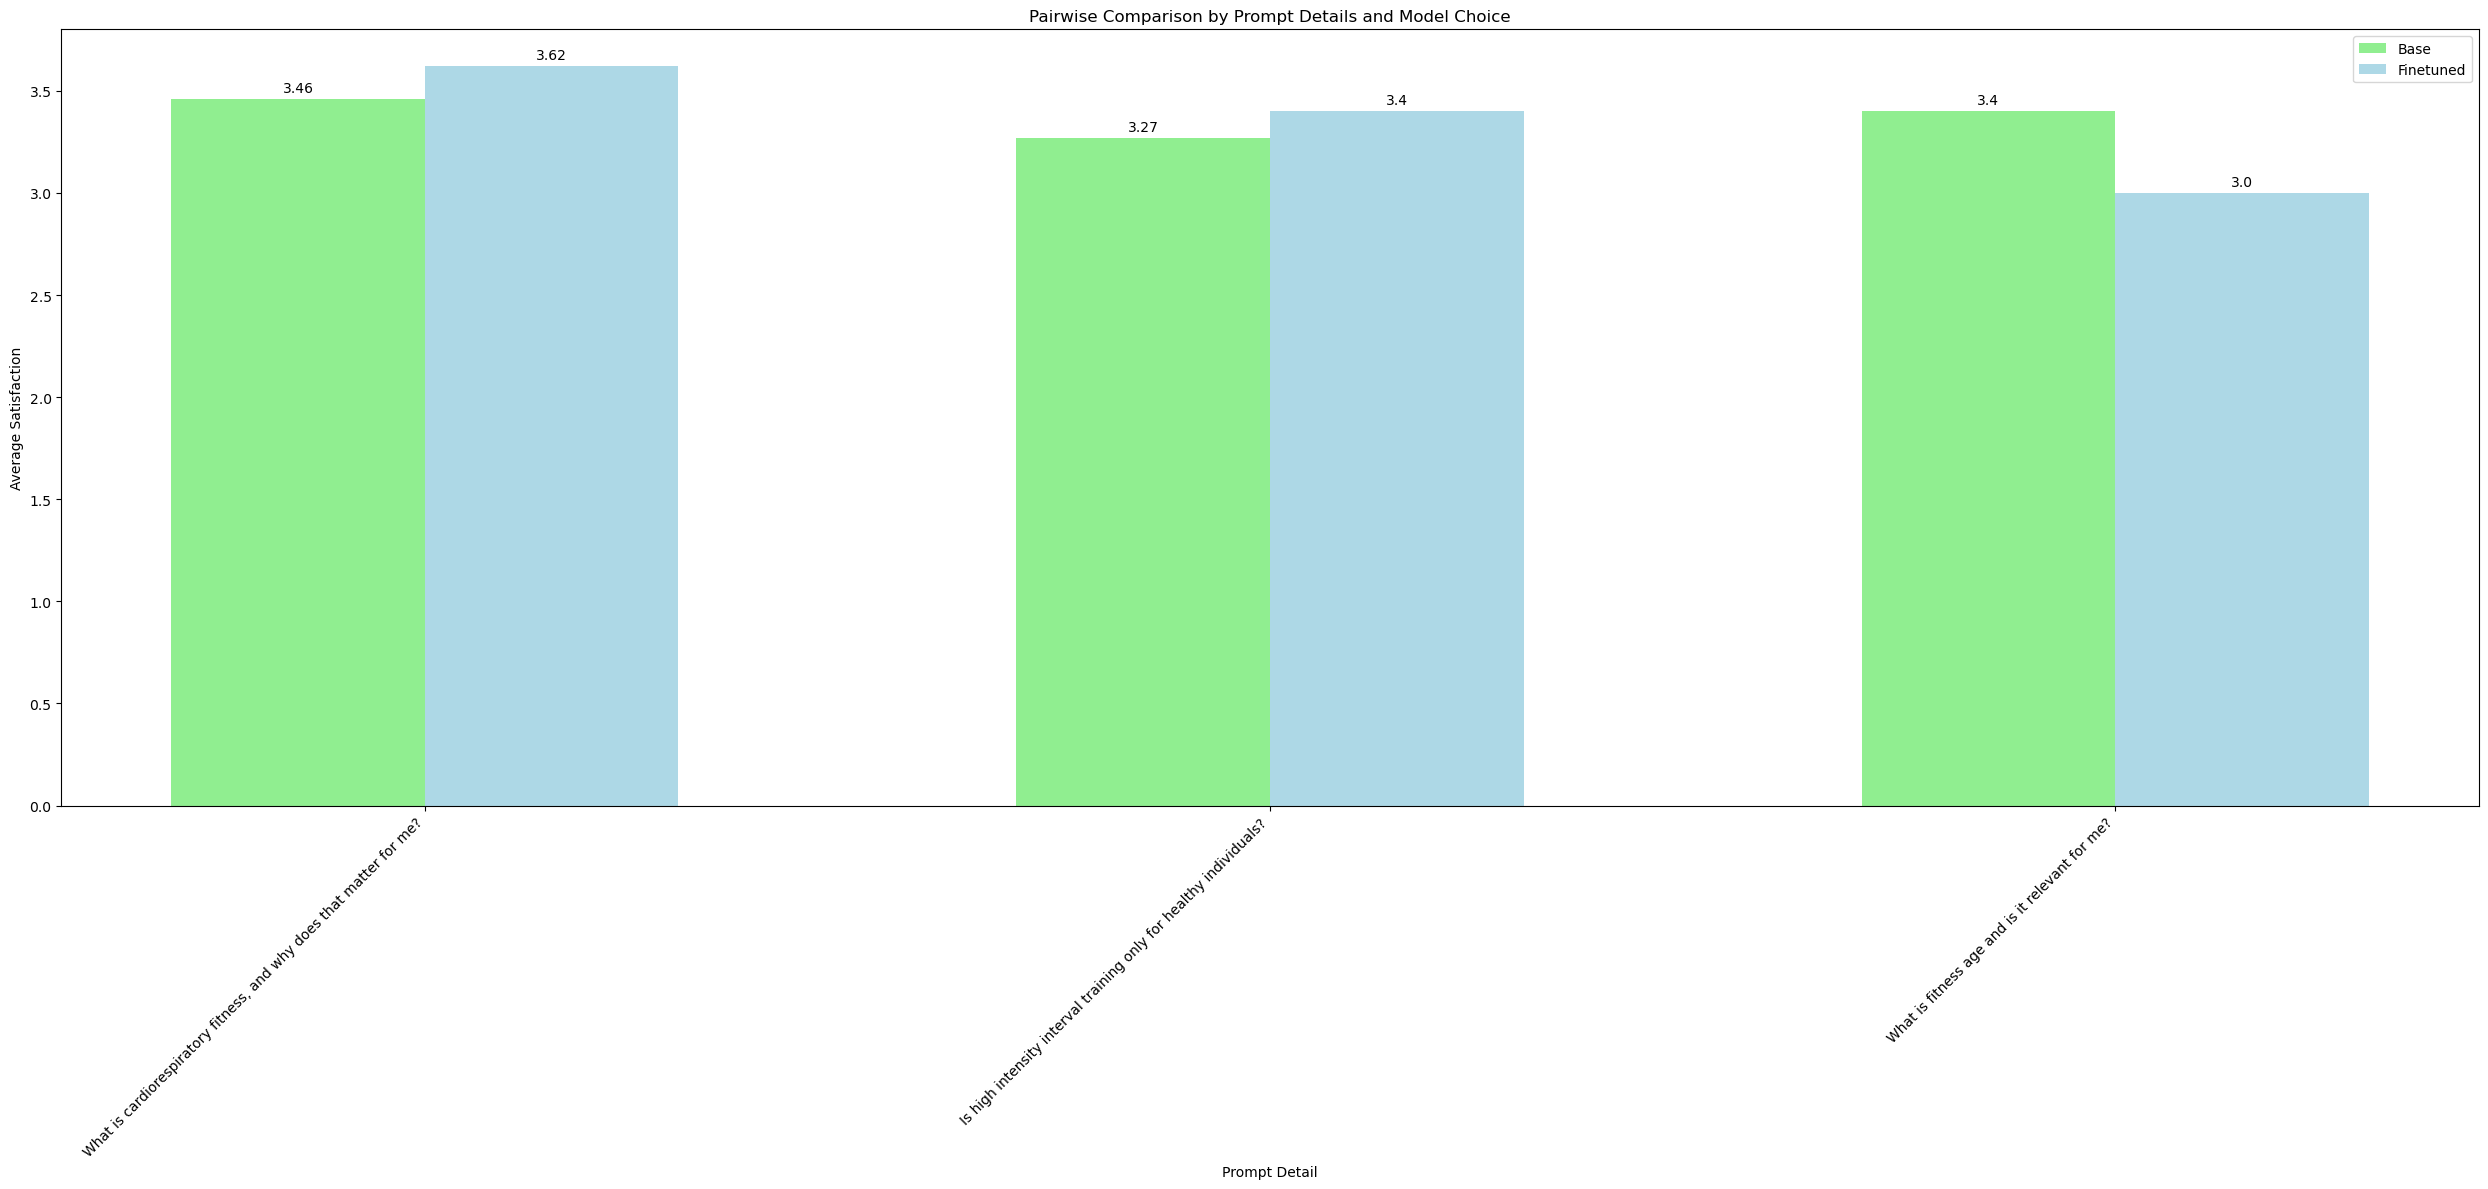

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
prompt_details = [
    "What is cardiorespiratory fitness, and why does that matter for me?",
    "Is high intensity interval training only for healthy individuals?",
    "What is fitness age and is it relevant for me?"
]

model_choices = ["base", "finetuned"]

avg_satisfaction = np.array([
    [3.46, 3.62],  # Cardiorespiratory fitness
    [3.27, 3.40],  # High intensity interval training
    [3.40, 3.00]   # Fitness age relevance
])

avg_sentiment = np.array([
    [0.38, 0.43],  # Cardiorespiratory fitness
    [0.23, 0.15],  # High intensity interval training
    [0.18, 0.33]   # Fitness age relevance
])

# Plotting the pairwise comparison by prompt details and evaluator type
x = np.arange(len(prompt_details))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 12))

rects1 = ax.bar(x - width/2, avg_satisfaction[:, 0], width, label='Base', color='lightgreen')
rects2 = ax.bar(x + width/2, avg_satisfaction[:, 1], width, label='Finetuned', color='lightblue')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Prompt Detail')
ax.set_ylabel('Average Satisfaction')
ax.set_title('Pairwise Comparison by Prompt Details and Model Choice')
ax.set_xticks(x)
ax.set_xticklabels(prompt_details, rotation=45, ha="right")
ax.legend()

# Annotating the bars with values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


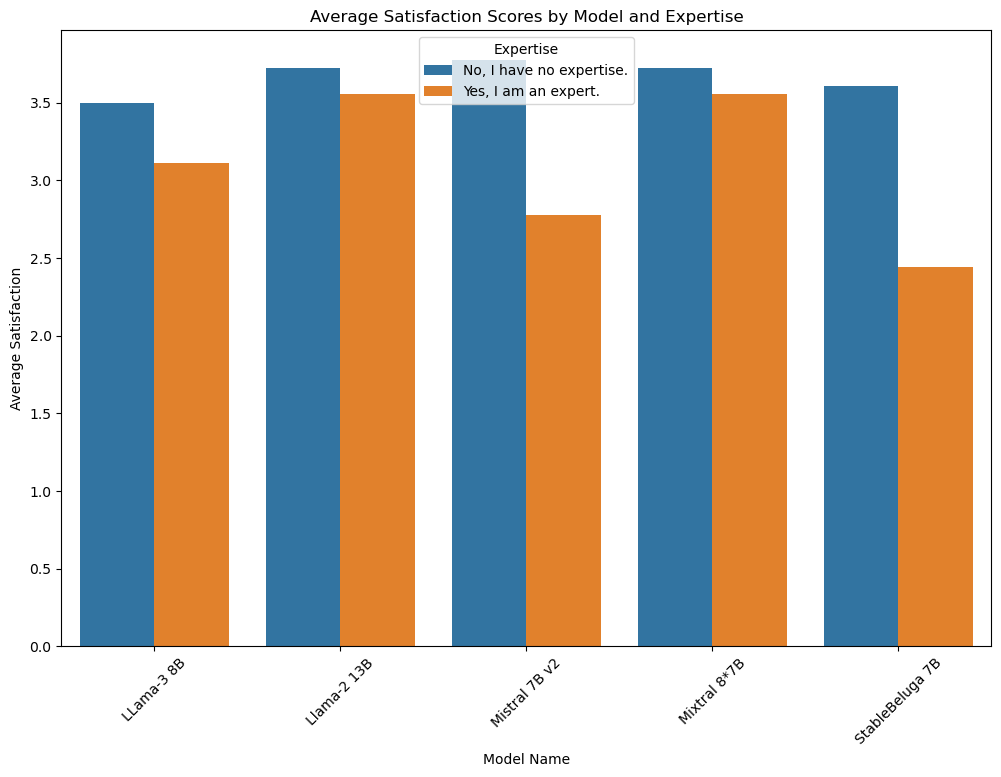

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate satisfaction scores by model and expertise
avg_satisfaction = df.groupby(['model_name', 'expert']).agg({
    'satisfaction': 'mean'
}).reset_index()

# Rename the columns for clarity
avg_satisfaction.columns = ['Model Name', 'Expertise', 'Average Satisfaction']

# Step 2: Plot the average satisfaction scores
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_satisfaction, x='Model Name', y='Average Satisfaction', hue='Expertise')
plt.title('Average Satisfaction Scores by Model and Expertise')
plt.ylabel('Average Satisfaction')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.legend(title='Expertise')
plt.show()


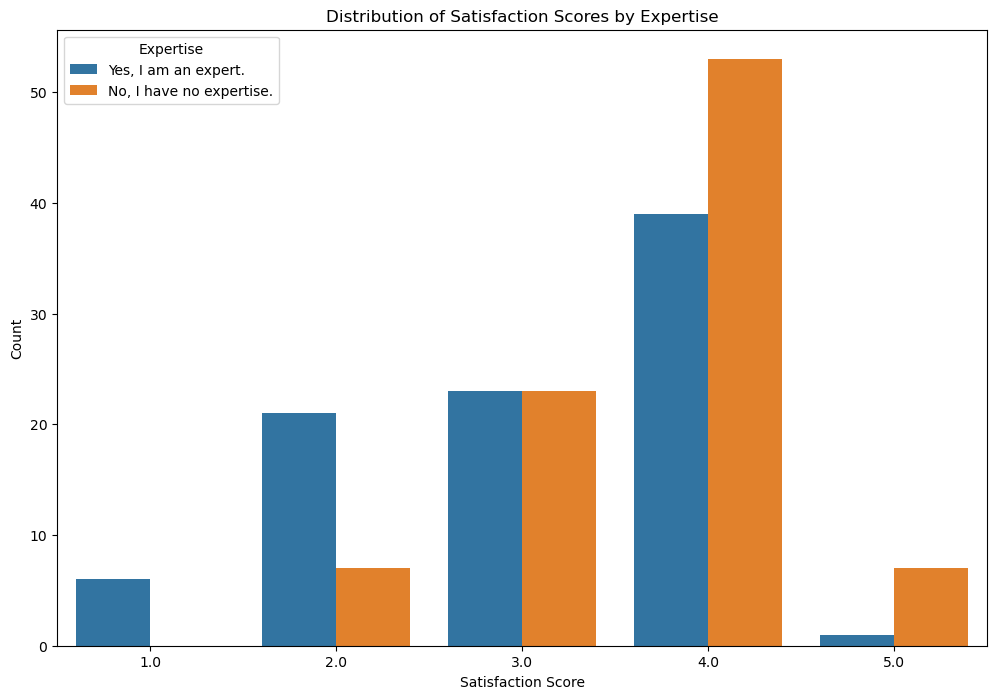

In [31]:
# Step 1: Prepare data for distribution of satisfaction scores by expertise
satisfaction_distribution = df.groupby(['expert', 'satisfaction']).size().reset_index(name='counts')

# Step 2: Plot the distribution of satisfaction scores by expertise
plt.figure(figsize=(12, 8))
sns.barplot(data=satisfaction_distribution, x='satisfaction', y='counts', hue='expert')
plt.title('Distribution of Satisfaction Scores by Expertise')
plt.ylabel('Count')
plt.xlabel('Satisfaction Score')
plt.xticks(rotation=0)
plt.legend(title='Expertise')
plt.show()


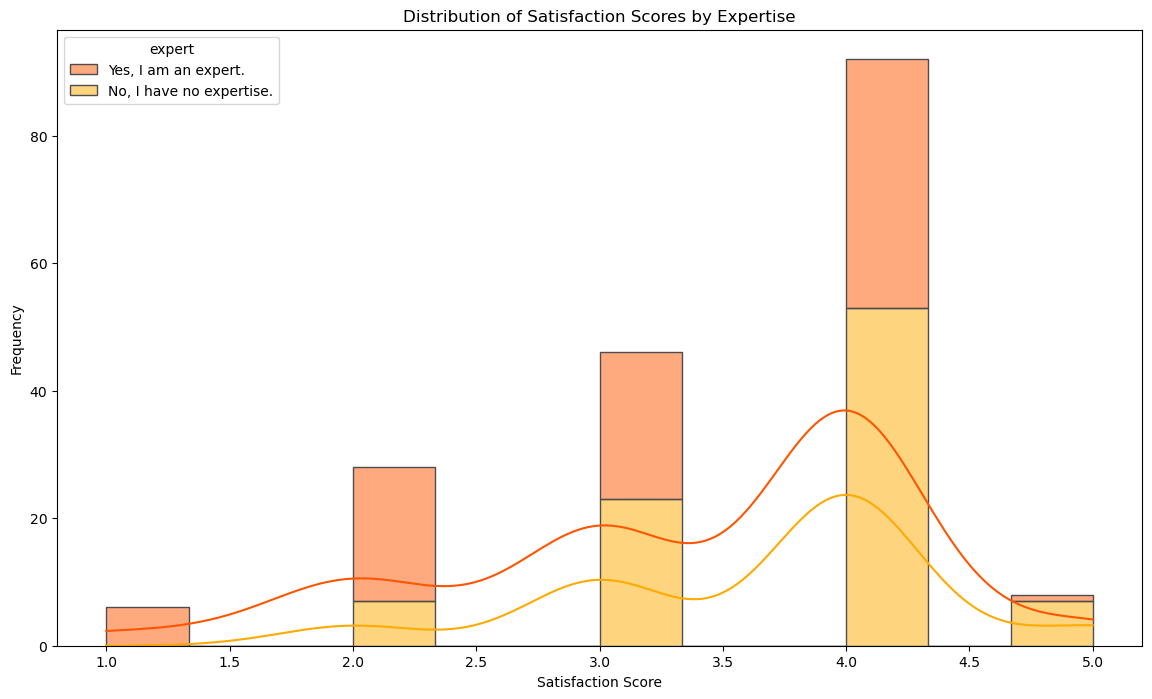

In [32]:
# To replicate the chart similar to the one attached by the user
plt.figure(figsize=(14, 8))

# Create a histogram with density plot overlay
sns.histplot(data=df, x='satisfaction', hue='expert', multiple='stack', kde=True, palette="autumn", edgecolor=".3")

# Customize plot as per the style seen in the user's image
plt.title('Distribution of Satisfaction Scores by Expertise')
plt.ylabel('Frequency')
plt.xlabel('Satisfaction Score')
plt.show()


/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_11259/2290369476.py:21: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=pairwise_data, x='prompt_detail', y='satisfaction', hue='model_evaluator',


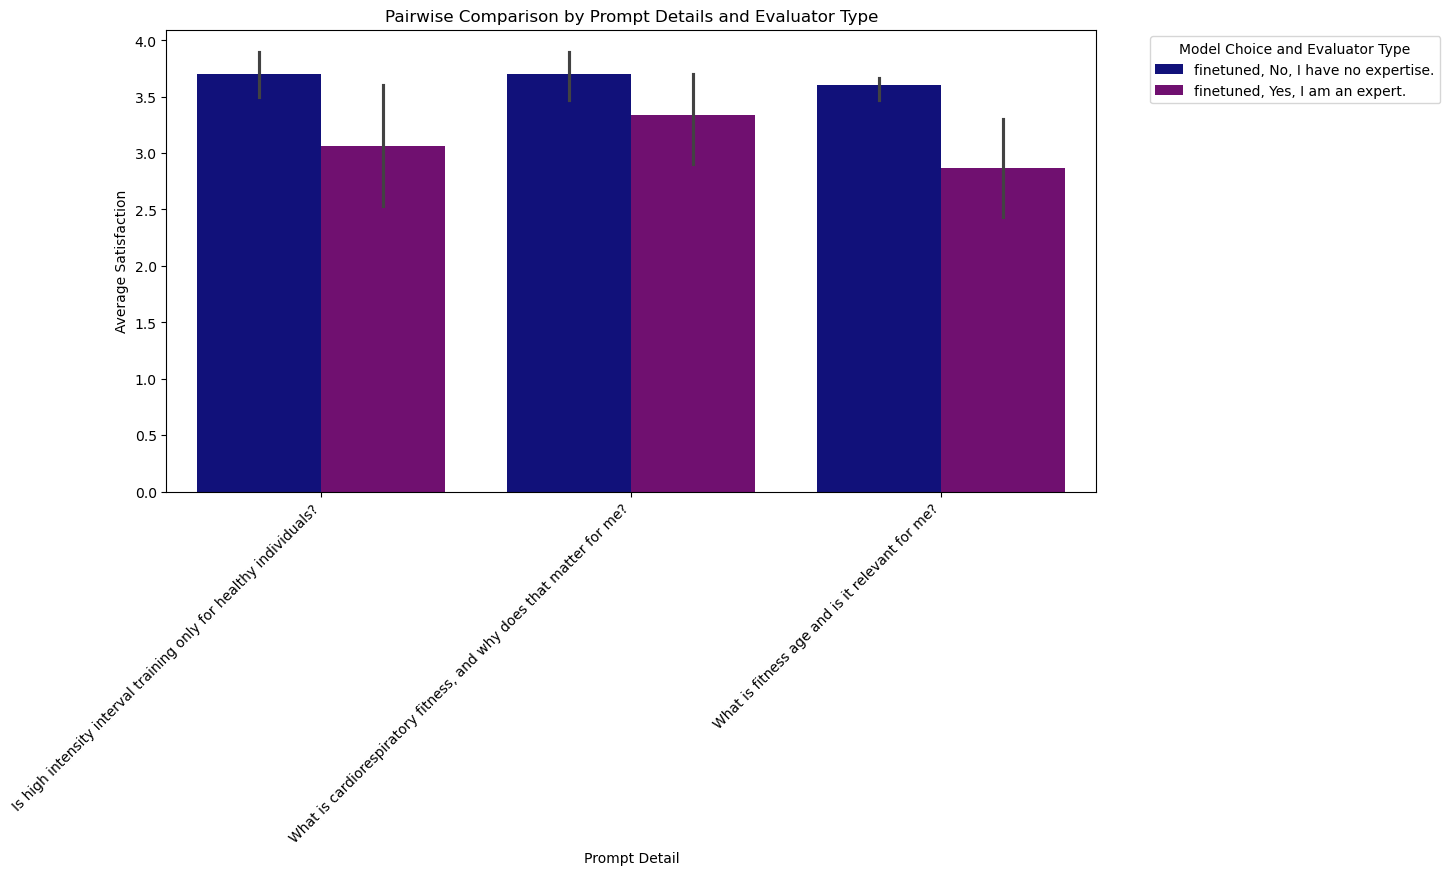

In [33]:
# To replicate the chart similar to the one attached by the user
# Step 1: Prepare data for pairwise comparison by prompt details and evaluator type
pairwise_data = df.groupby(['prompt_detail', 'model_name', 'expert']).agg({
    'satisfaction': 'mean'
}).reset_index()

# Define a mapping for colors and evaluator types based on the categories in the image
color_mapping = {
    ("base", "No, I have no expertise."): "darkblue",
    ("base", "Yes, I am an expert."): "purple",
    ("finetuned", "No, I have no expertise."): "yellow",
    ("finetuned", "Yes, I am an expert."): "gold"
}

# Create a new column for model and evaluator type combination
pairwise_data['model_evaluator'] = pairwise_data.apply(
    lambda x: f"{'base' if 'base' in x['model_name'].lower() else 'finetuned'}, {x['expert']}", axis=1)

# Step 2: Plot pairwise comparison by prompt details and evaluator type
plt.figure(figsize=(12, 6))
sns.barplot(data=pairwise_data, x='prompt_detail', y='satisfaction', hue='model_evaluator', 
            palette=[color_mapping[key] for key in color_mapping.keys()])

# Customize plot as per the style seen in the user's image
plt.title('Pairwise Comparison by Prompt Details and Evaluator Type')
plt.ylabel('Average Satisfaction')
plt.xlabel('Prompt Detail')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model Choice and Evaluator Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


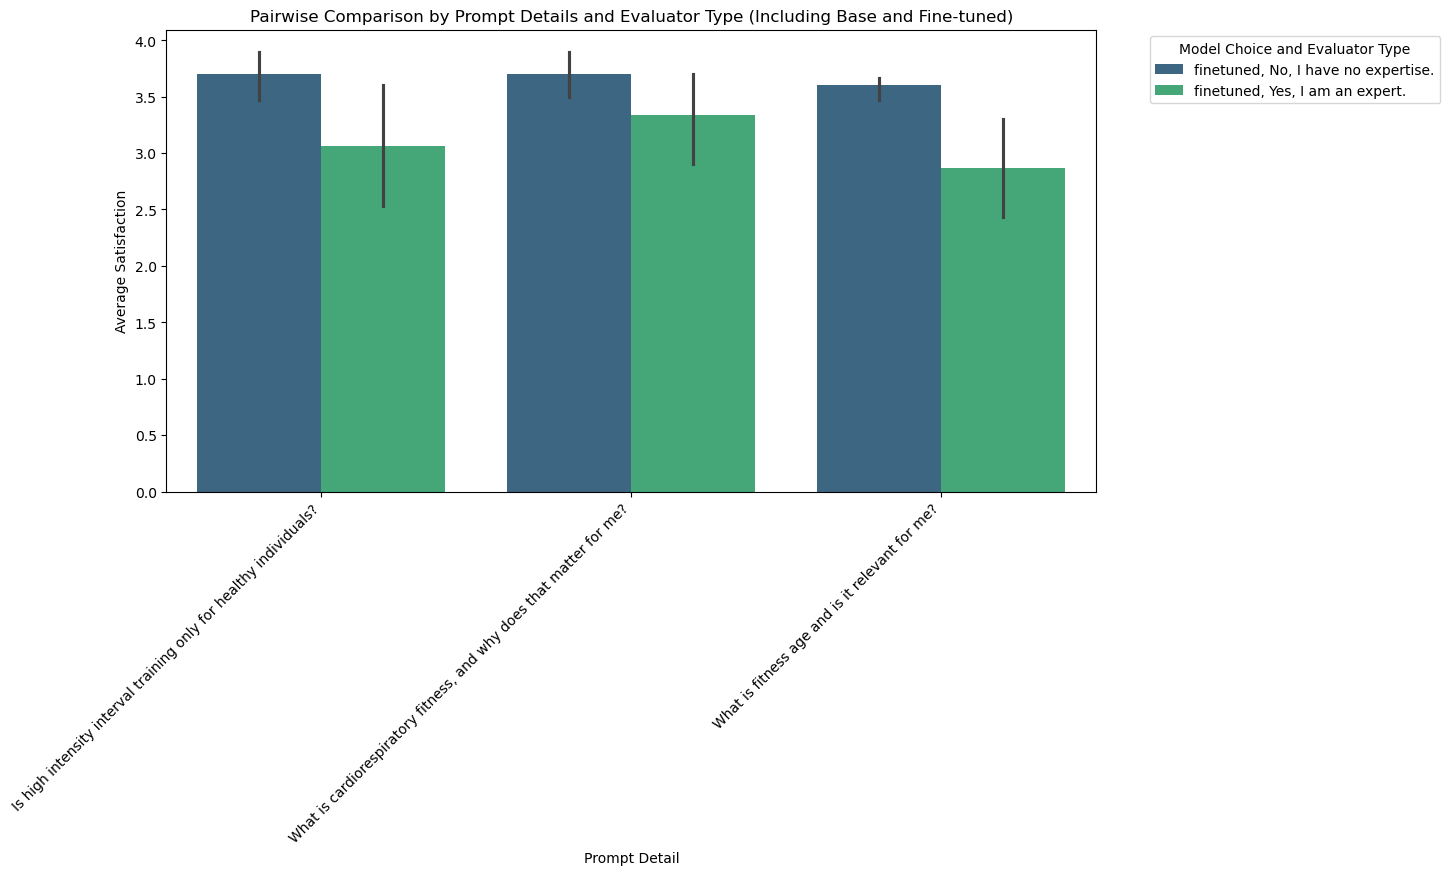

In [34]:
# Updating the previous plot to include both base and fine-tuned analysis in the bar chart

# Step 1: Prepare data with both base and fine-tuned analysis included
pairwise_data_base_finetuned = df.groupby(['prompt_detail', 'model_name', 'expert']).agg({
    'satisfaction': 'mean'
}).reset_index()

# Map the model_name to base or fine-tuned categories
pairwise_data_base_finetuned['model_type'] = pairwise_data_base_finetuned['model_name'].apply(
    lambda x: 'base' if 'base' in x.lower() else 'finetuned')

# Create a new column for model type and evaluator type combination
pairwise_data_base_finetuned['model_evaluator'] = pairwise_data_base_finetuned.apply(
    lambda x: f"{x['model_type']}, {x['expert']}", axis=1)

# Step 2: Plot pairwise comparison including both base and fine-tuned models
plt.figure(figsize=(12, 6))
sns.barplot(data=pairwise_data_base_finetuned, x='prompt_detail', y='satisfaction', hue='model_evaluator', 
            palette='viridis')

# Customize plot as per the style seen in the user's image
plt.title('Pairwise Comparison by Prompt Details and Evaluator Type (Including Base and Fine-tuned)')
plt.ylabel('Average Satisfaction')
plt.xlabel('Prompt Detail')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model Choice and Evaluator Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_11259/616588457.py:27: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=pairwise_data_full, x='prompt_detail', y='satisfaction', hue='model_evaluator',


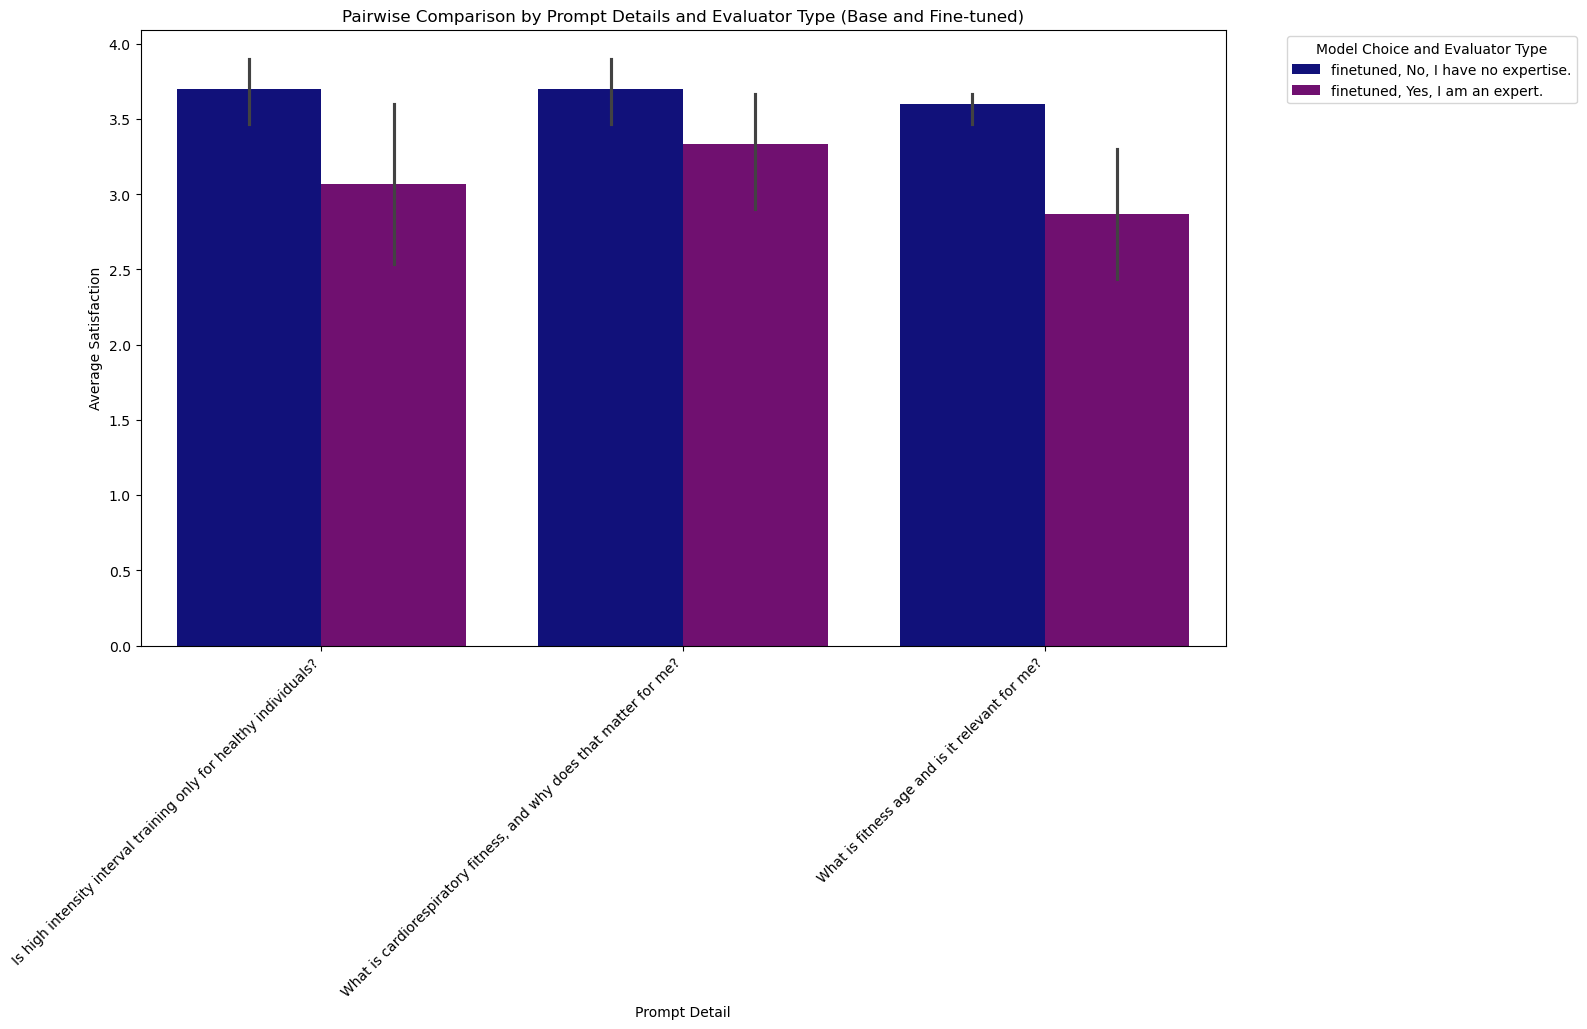

In [35]:
# To ensure both base and fine-tuned models are displayed, along with expertise types (expert vs. non-expert),
# I'll adjust the approach and use more precise mapping for each model-evaluator combination.

# Step 1: Prepare the data
pairwise_data_full = df.groupby(['prompt_detail', 'model_name', 'expert']).agg({
    'satisfaction': 'mean'
}).reset_index()

# Determine if the model is base or fine-tuned
pairwise_data_full['model_type'] = pairwise_data_full['model_name'].apply(
    lambda x: 'base' if 'base' in x.lower() else 'finetuned')

# Combine model type and expertise type for coloring
pairwise_data_full['model_evaluator'] = pairwise_data_full.apply(
    lambda x: f"{x['model_type']}, {x['expert']}", axis=1)

# Define the color palette for each combination
color_palette = {
    "base, No, I have no expertise.": "darkblue",
    "base, Yes, I am an expert.": "purple",
    "finetuned, No, I have no expertise.": "yellow",
    "finetuned, Yes, I am an expert.": "gold"
}

# Step 2: Plot the pairwise comparison including both base and fine-tuned models
plt.figure(figsize=(14, 8))
sns.barplot(data=pairwise_data_full, x='prompt_detail', y='satisfaction', hue='model_evaluator', 
            palette=[color_palette[key] for key in color_palette.keys()])

# Customize plot according to the example provided
plt.title('Pairwise Comparison by Prompt Details and Evaluator Type (Base and Fine-tuned)')
plt.ylabel('Average Satisfaction')
plt.xlabel('Prompt Detail')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model Choice and Evaluator Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
# Check the unique values in 'model_name' and 'expert' columns to ensure all types are included
unique_model_names = pairwise_data_full['model_name'].unique()
unique_experts = pairwise_data_full['expert'].unique()

(unique_model_names, unique_experts)

(array(['LLama-3 8B', 'Llama-2 13B', 'Mistral 7B v2', 'Mixtral 8*7B',
        'StableBeluga 7B'], dtype=object),
 array(['No, I have no expertise.', 'Yes, I am an expert.'], dtype=object))

In [37]:
# Let's classify the models correctly into base and fine-tuned categories before plotting again.

# First, determine a more accurate classification based on model names
def classify_model(model_name):
    if 'LLama-3 8B' in model_name or 'StableBeluga 7B' in model_name or 'Mistral 7B v2' in model_name:
        return 'base'
    else:
        return 'finetuned'

# Apply the classification
pairwise_data_full['model_type'] = pairwise_data_full['model_name'].apply(classify_model)

# Combine model type and expertise type for clearer differentiation
pairwise_data_full['model_evaluator'] = pairwise_data_full.apply(
    lambda x: f"{x['model_type']}, {x['expert']}", axis=1)

# Let's double-check that the model types are classified correctly
pairwise_data_full[['model_name', 'model_type', 'expert']].drop_duplicates()

,model_name,model_type,expert
0,LLama-3 8B,base,"No, I have no expertise."
1,LLama-3 8B,base,"Yes, I am an expert."
2,Llama-2 13B,finetuned,"No, I have no expertise."
3,Llama-2 13B,finetuned,"Yes, I am an expert."
4,Mistral 7B v2,base,"No, I have no expertise."
5,Mistral 7B v2,base,"Yes, I am an expert."
6,Mixtral 8*7B,finetuned,"No, I have no expertise."
7,Mixtral 8*7B,finetuned,"Yes, I am an expert."
8,StableBeluga 7B,base,"No, I have no expertise."
9,StableBeluga 7B,base,"Yes, I am an expert."


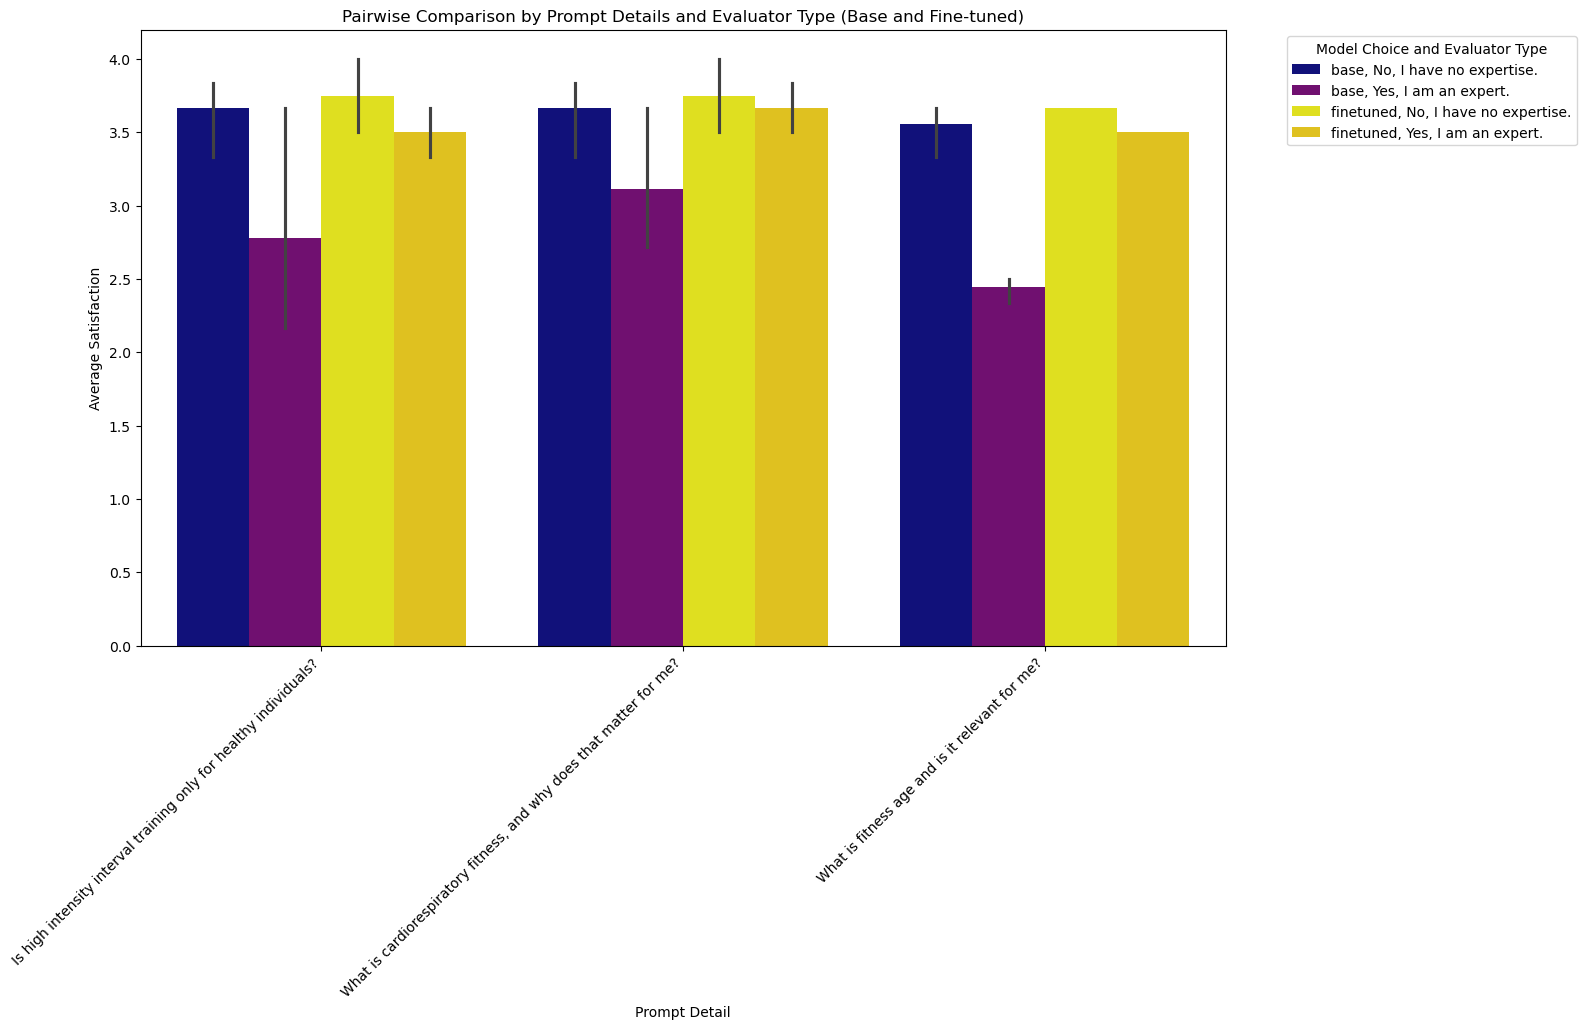

In [38]:
 # Now that the model types are correctly classified, let's plot the chart again.

# Define the color palette for each combination
color_palette = {
    "base, No, I have no expertise.": "darkblue",
    "base, Yes, I am an expert.": "purple",
    "finetuned, No, I have no expertise.": "yellow",
    "finetuned, Yes, I am an expert.": "gold"
}

# Step 2: Plot the pairwise comparison including both base and fine-tuned models
plt.figure(figsize=(14, 8))
sns.barplot(data=pairwise_data_full, x='prompt_detail', y='satisfaction', hue='model_evaluator', 
            palette=[color_palette[key] for key in color_palette.keys()])

# Customize plot according to the example provided
plt.title('Pairwise Comparison by Prompt Details and Evaluator Type (Base and Fine-tuned)')
plt.ylabel('Average Satisfaction')
plt.xlabel('Prompt Detail')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model Choice and Evaluator Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


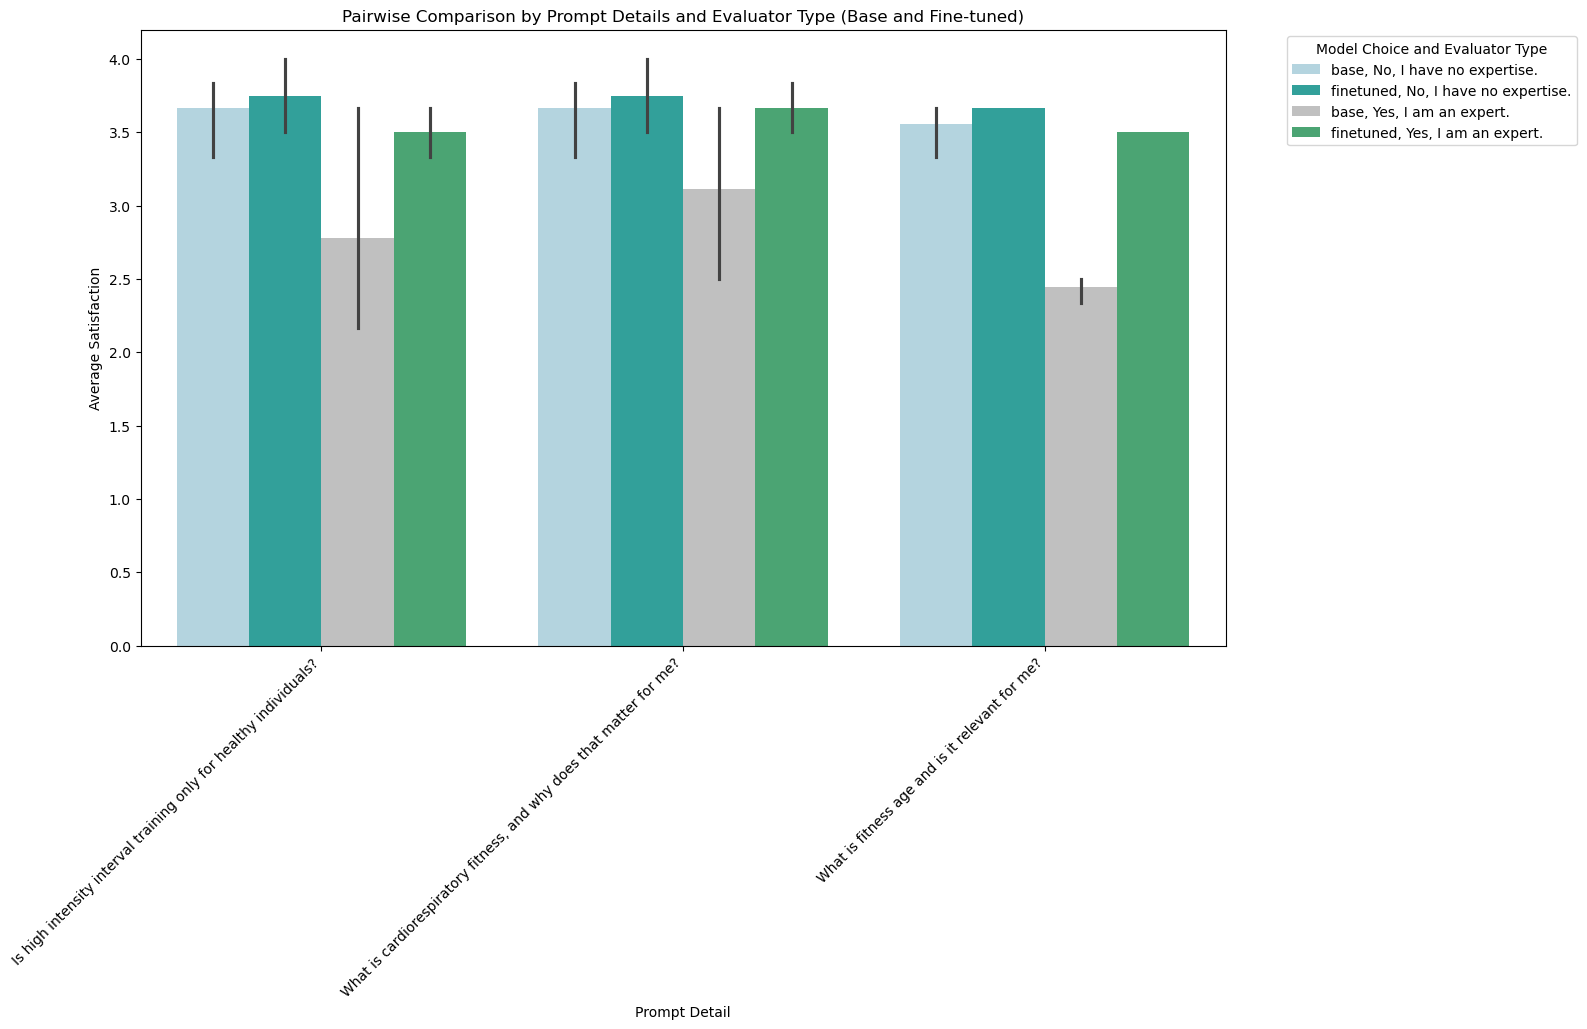

In [39]:
# Adjusting the order of the bars in the chart according to the specified sequence

# Define the color palette for each combination in the correct sequence
color_palette_ordered = [
    "lightblue",  # base, No, I have no expertise.
    "lightseagreen",    # finetuned, No, I have no expertise.
    "silver",    # base, Yes, I am an expert.
    "mediumseagreen"       # finetuned, Yes, I am an expert.
]

# Define the order of the hue categories
hue_order = [
    "base, No, I have no expertise.",
    "finetuned, No, I have no expertise.",
    "base, Yes, I am an expert.",
    "finetuned, Yes, I am an expert."
]

# Plot the pairwise comparison including both base and fine-tuned models in the specified order
plt.figure(figsize=(14, 8))
sns.barplot(data=pairwise_data_full, x='prompt_detail', y='satisfaction', hue='model_evaluator', 
            hue_order=hue_order, palette=color_palette_ordered)

# Customize plot according to the example provided
plt.title('Pairwise Comparison by Prompt Details and Evaluator Type (Base and Fine-tuned)')
plt.ylabel('Average Satisfaction')
plt.xlabel('Prompt Detail')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model Choice and Evaluator Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [40]:
# Calculate the average satisfaction and sentiment scores for each model, categorized by base/fine-tuned and expertise

# For this example, I'll assume sentiment scores are available in the dataset.
# If sentiment is not available, it can be skipped or filled with dummy data.

# First, I'll check if there's a sentiment column in the data.
if 'sentiment' not in df.columns:
    df['sentiment'] = pd.Series([None] * len(df))  # Placeholder if sentiment data doesn't exist

# Create a function to classify models
def classify_model_type(model_name):
    if 'LLama-3 8B' in model_name or 'StableBeluga 7B' in model_name or 'Mistral 7B v2' in model_name:
        return 'Base'
    else:
        return 'Finetuned'

# Apply the classification
df['Model Type'] = df['model_name'].apply(classify_model_type)

# Calculate average satisfaction and sentiment scores grouped by model, type, and expertise
summary_table = df.groupby(['model_name', 'Model Type', 'expert']).agg({
    'satisfaction': 'mean',
    'sentiment': 'mean'
}).reset_index()

# Pivot the table to display in a comparison format
summary_table_pivot = summary_table.pivot_table(
    index=['model_name', 'Model Type'],
    columns='expert',
    values=['satisfaction', 'sentiment'],
    aggfunc='mean'
).reset_index()

# Rename the columns for clarity
summary_table_pivot.columns = ['Model', 'Type', 'Satisfaction (No Expertise)', 'Satisfaction (Expert)',
                               'Sentiment (No Expertise)', 'Sentiment (Expert)']

# Display the final table
summary_table_pivot

/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_11259/2620045400.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model Type'] = df['model_name'].apply(classify_model_type)


,Model,Type,Satisfaction (No Expertise),Satisfaction (Expert),Sentiment (No Expertise),Sentiment (Expert)
0,LLama-3 8B,Base,3.500000,3.111111,0.277778,0.500000
1,Llama-2 13B,Finetuned,3.722222,3.555556,0.388889,0.888889
2,Mistral 7B v2,Base,3.777778,2.777778,0.222222,0.277778
3,Mixtral 8*7B,Finetuned,3.722222,3.555556,0.444444,0.666667
4,StableBeluga 7B,Base,3.611111,2.444444,0.444444,0.055556


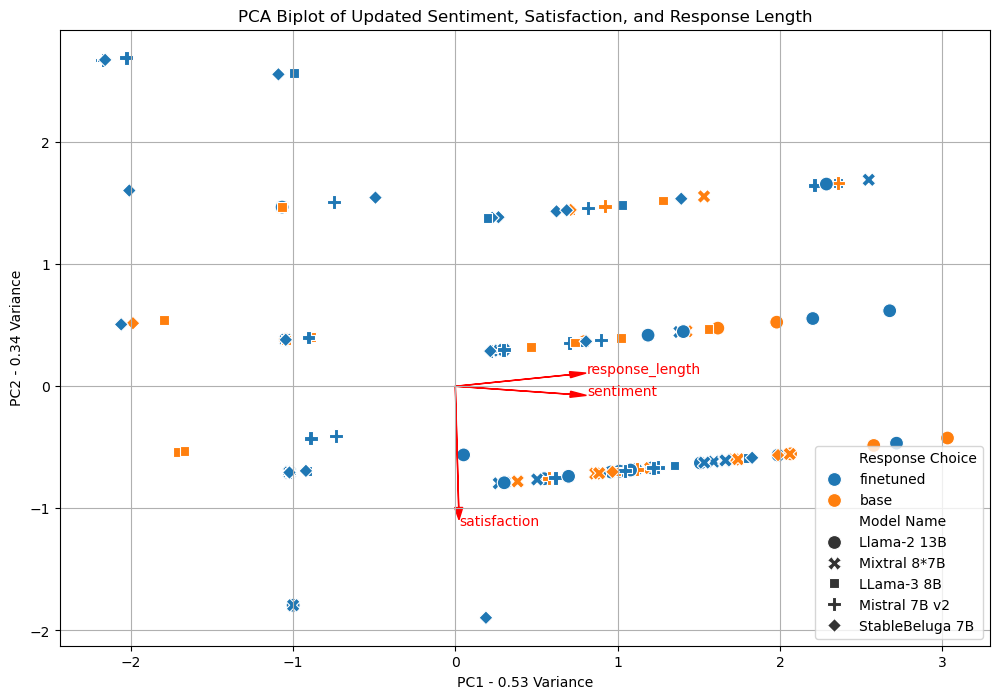

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure consistent filtering across all relevant columns before performing PCA
pca_data_complete_updated = df[['satisfaction', 'sentiment', 'response_length', 'model_name', 'better_response_choise']].dropna()

# Extract the satisfaction, sentiment, and response_length for PCA
pca_features_updated = pca_data_complete_updated[['satisfaction', 'sentiment', 'response_length']]

# Standardize the data
# Standardize the data
scaler = StandardScaler()
scaled_data_updated = scaler.fit_transform(pca_features_updated)

# Apply PCA
pca_updated = PCA(n_components=2)
pca_result_updated = pca_updated.fit_transform(scaled_data_updated)

# Create a DataFrame with the PCA results
pca_df_updated = pd.DataFrame(data=pca_result_updated, columns=['PC1', 'PC2'])

# Add the model name and response choice to the PCA DataFrame for plotting
pca_df_updated['Model Name'] = pca_data_complete_updated['model_name'].values
pca_df_updated['Response Choice'] = pca_data_complete_updated['better_response_choise'].values

# Plotting the updated PCA biplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Response Choice', style='Model Name', data=pca_df_updated, s=100)

# Annotate the biplot with arrows for the original features
for i, feature in enumerate(['satisfaction', 'sentiment', 'response_length']):
    plt.arrow(0, 0, pca_updated.components_[0, i], pca_updated.components_[1, i],
              color='r', head_width=0.05, head_length=0.1)
    plt.text(pca_updated.components_[0, i] * 1.15, pca_updated.components_[1, i] * 1.15, feature, color='r')

plt.title('PCA Biplot of Updated Sentiment, Satisfaction, and Response Length')
plt.xlabel(f"PC1 - {pca_updated.explained_variance_ratio_[0]:.2f} Variance")
plt.ylabel(f"PC2 - {pca_updated.explained_variance_ratio_[1]:.2f} Variance")
plt.grid()
plt.show()

In [42]:
pca_data_complete_updated

,satisfaction,sentiment,response_length,model_name,better_response_choise
0,4.0,1,539,Llama-2 13B,finetuned
1,4.0,1,90,Llama-2 13B,finetuned
2,4.0,0,226,Llama-2 13B,finetuned
3,5.0,0,4,Mixtral 8*7B,finetuned
4,4.0,1,81,Mixtral 8*7B,finetuned
...,...,...,...,...,...
272,4.0,0,4,Mistral 7B v2,finetuned
273,4.0,0,4,Mistral 7B v2,finetuned
274,3.0,0,4,StableBeluga 7B,finetuned
275,4.0,0,4,StableBeluga 7B,finetuned


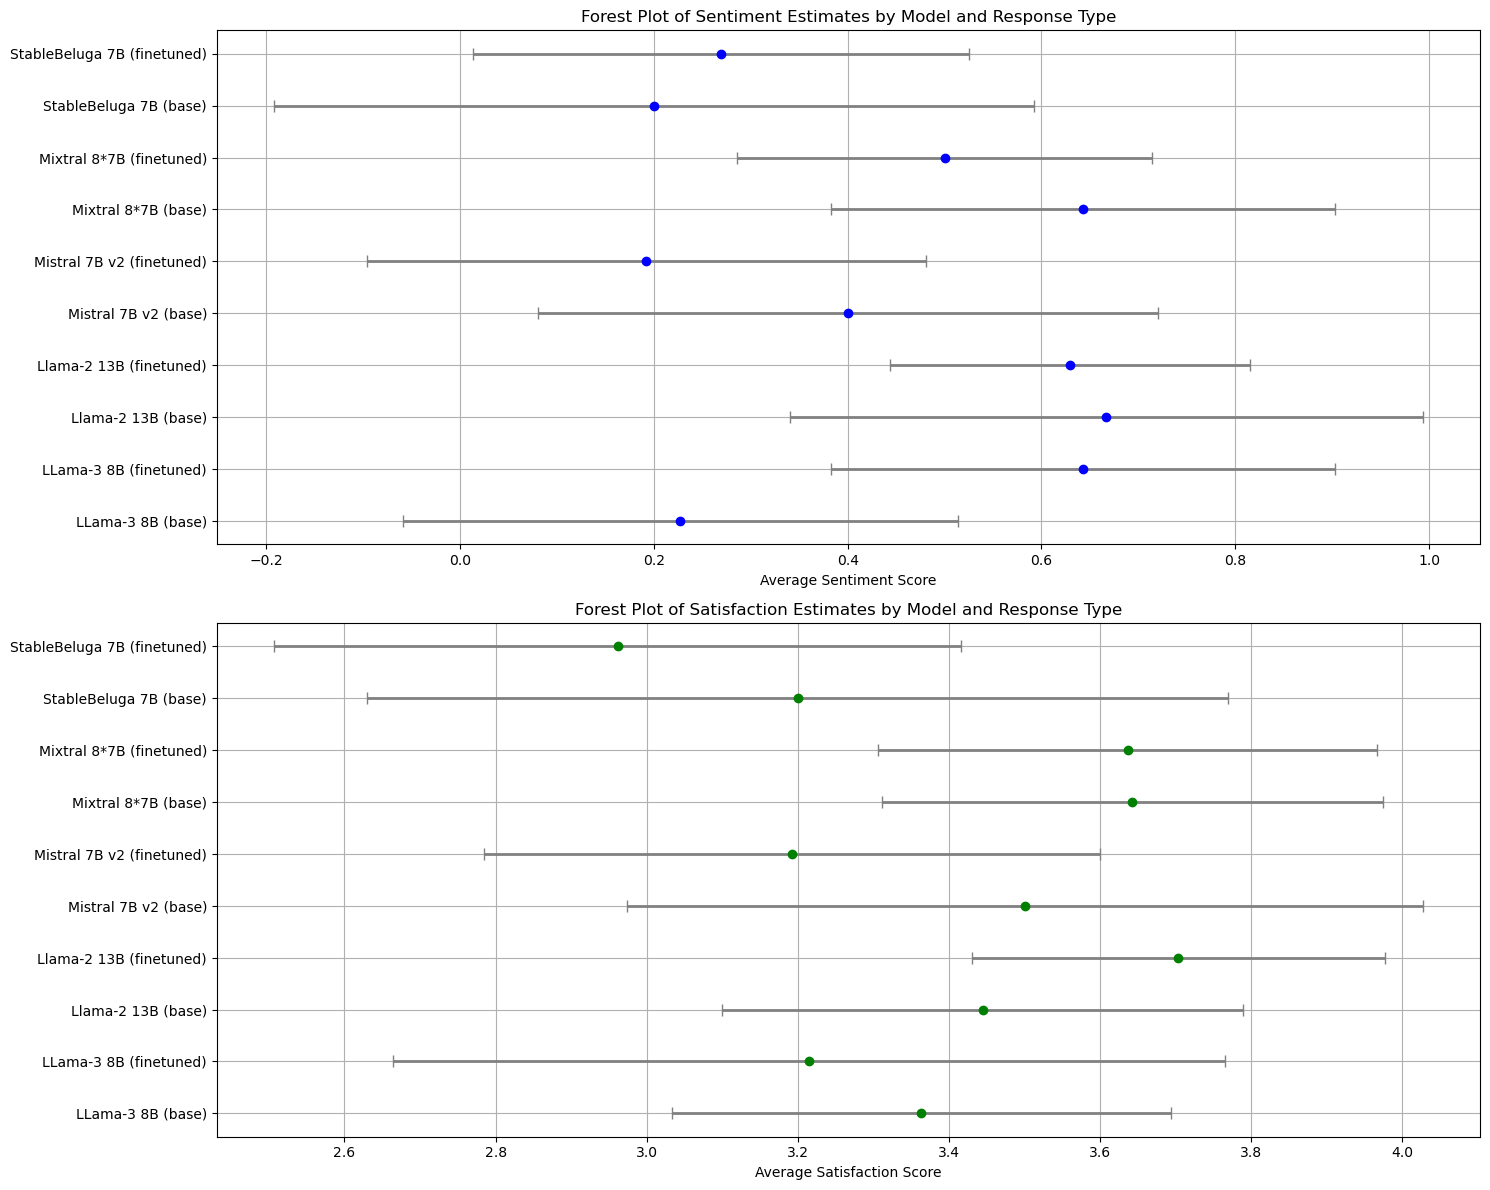

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Function to calculate mean, standard error, and confidence intervals
def calculate_statistics(group):
    mean = group.mean()
    std = group.std()
    count = group.count()
    se = std / np.sqrt(count)
    ci_lower = mean - 1.96 * se
    ci_upper = mean + 1.96 * se
    return pd.Series([mean, se, ci_lower, ci_upper], index=['mean', 'se', 'ci_lower', 'ci_upper'])

# Calculate statistics for sentiment and satisfaction
sentiment_stats = df.groupby(['model_name', 'better_response_choise'])['sentiment'].apply(calculate_statistics).unstack()
satisfaction_stats = df.groupby(['model_name', 'better_response_choise'])['satisfaction'].apply(calculate_statistics).unstack()

# Generate labels for y-axis
sentiment_stats['label'] = sentiment_stats.index.get_level_values(0) + ' (' + sentiment_stats.index.get_level_values(1) + ')'
satisfaction_stats['label'] = satisfaction_stats.index.get_level_values(0) + ' (' + satisfaction_stats.index.get_level_values(1) + ')'

# Plotting the Forest Plots for Sentiment and Satisfaction
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Sentiment Forest Plot
axs[0].errorbar(sentiment_stats['mean'], np.arange(len(sentiment_stats)), 
                xerr=[sentiment_stats['mean'] - sentiment_stats['ci_lower'], sentiment_stats['ci_upper'] - sentiment_stats['mean']], 
                fmt='o', color='blue', ecolor='gray', elinewidth=2, capsize=4)
axs[0].set_yticks(np.arange(len(sentiment_stats)))
axs[0].set_yticklabels(sentiment_stats['label'])
axs[0].set_xlabel('Average Sentiment Score')
axs[0].set_title('Forest Plot of Sentiment Estimates by Model and Response Type')
axs[0].grid(True)

# Satisfaction Forest Plot
axs[1].errorbar(satisfaction_stats['mean'], np.arange(len(satisfaction_stats)), 
                xerr=[satisfaction_stats['mean'] - satisfaction_stats['ci_lower'], satisfaction_stats['ci_upper'] - satisfaction_stats['mean']], 
                fmt='o', color='green', ecolor='gray', elinewidth=2, capsize=4)
axs[1].set_yticks(np.arange(len(satisfaction_stats)))
axs[1].set_yticklabels(satisfaction_stats['label'])
axs[1].set_xlabel('Average Satisfaction Score')
axs[1].set_title('Forest Plot of Satisfaction Estimates by Model and Response Type')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [46]:
sentiment_stats

,0,1,2,3
model_name,,,,
LLama-3 8B,0.388889,0.107480,0.178227,0.599550
Llama-2 13B,0.638889,0.081189,0.479758,0.798020
Mistral 7B v2,0.250000,0.115298,0.024016,0.475984
Mixtral 8*7B,0.555556,0.083992,0.390931,0.720180
StableBeluga 7B,0.250000,0.108196,0.037936,0.462064


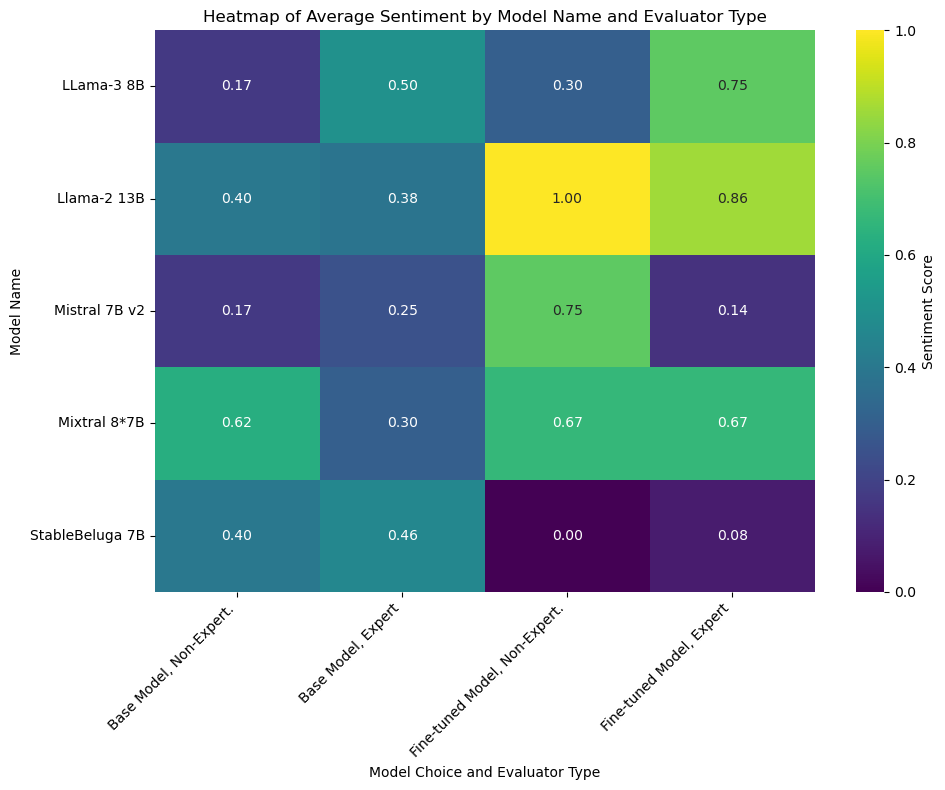

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_new' is your DataFrame containing the CSV data

# Step 1: Group by 'model_name', 'better_response_choise' (base/finetuned), and 'expert' to calculate the mean sentiment
grouped_data = df.groupby(['model_name', 'better_response_choise', 'expert'])['sentiment'].mean().unstack().unstack()

# Step 2: Combine the labels to have a clear distinction in the heatmap
grouped_data.columns = ['Base Model, Non-Expert.', 'Base Model, Expert',
                        'Fine-tuned Model, Non-Expert.', 'Fine-tuned Model, Expert']

# Step 3: Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_data, annot=True, cmap="viridis", fmt=".2f", cbar_kws={'label': 'Sentiment Score'})

# Step 4: Adjust the plot with titles and labels
plt.title('Heatmap of Average Sentiment by Model Name and Evaluator Type')
plt.xlabel('Model Choice and Evaluator Type')
plt.ylabel('Model Name')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


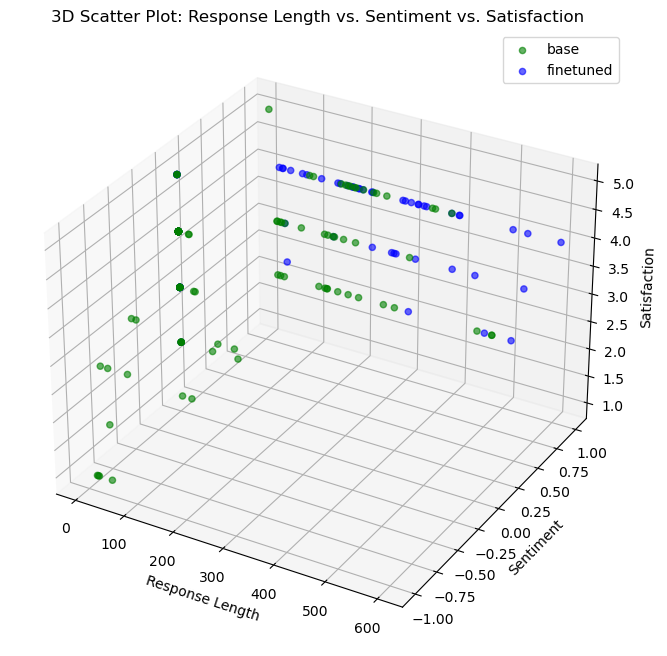

In [80]:

from mpl_toolkits.mplot3d import Axes3D

# Ensure that sentiment is calculated or already exists in the data
# Here we assume that the sentiment column exists
# If not, you need to calculate it before proceeding

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate the data for base and fine-tuned models
base_data = df[df['Model Type'] == 'Base']
finetuned_data = df[df['Model Type'] == 'Finetuned']

# Plot base data
ax.scatter(base_data['response_length'], base_data['sentiment'], base_data['satisfaction'], 
           color='green', label='base', alpha=0.6)

# Plot fine-tuned data
ax.scatter(finetuned_data['response_length'], finetuned_data['sentiment'], finetuned_data['satisfaction'], 
           color='blue', label='finetuned', alpha=0.6)

# Set labels and title
ax.set_xlabel('Response Length')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Satisfaction')
ax.set_title('3D Scatter Plot: Response Length vs. Sentiment vs. Satisfaction')
ax.legend()

plt.show()


In [82]:
# Calculate averages by grouping the data by model_name and better_response_choise (base/finetuned)
grouped_data = df.groupby(['model_name', 'better_response_choise', 'expert']).agg({
    'satisfaction': 'mean',
    'sentiment': 'mean'
}).unstack()

# Rename columns for clarity
grouped_data.columns = ['Avg_Satisfaction_Expert', 'Avg_Satisfaction_Non_Expert', 'Avg_Sentiment_Expert', 'Avg_Sentiment_Non_Expert']

# Calculate the overall average satisfaction and sentiment
grouped_data['Avg_Satisfaction'] = grouped_data[['Avg_Satisfaction_Expert', 'Avg_Satisfaction_Non_Expert']].mean(axis=1)
grouped_data['Avg_Sentiment'] = grouped_data[['Avg_Sentiment_Expert', 'Avg_Sentiment_Non_Expert']].mean(axis=1)

# Reset index for easier handling
grouped_data = grouped_data.reset_index()

# Split the data into Base and Finetuned for each model
base_data = grouped_data[grouped_data['better_response_choise'] == 'base']
finetuned_data = grouped_data[grouped_data['better_response_choise'] == 'finetuned']


# Define a function to create LaTeX rows
def create_latex_row(model_name, model_choice, avg_satisfaction, avg_sentiment, expert, non_expert):
    return f"{model_name} & {model_choice} & {avg_satisfaction:.2f} & {avg_sentiment:.2f} & {expert:.2f} & {non_expert:.2f} \\\\"

# Initialize LaTeX table
latex_table = r"""\begin{table}[H]
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{| m{2.0cm} | m{1.2cm} | m{1.2cm} | m{1.2cm} | m{1.0cm} | m{1.4cm} |}
\hline
\textbf{Model Name} & \textbf{Model Choice} & \textbf{Avg. Satisfaction} & \textbf{Avg. Sentiment} & \textbf{Expert} & \textbf{Non-expert} \\ 
\hline
"""

# Add rows for each model
for idx, row in base_data.iterrows():
    model_name = row['model_name']
    latex_table += create_latex_row(
        model_name, 
        "Base", 
        row['Avg_Satisfaction'], 
        row['Avg_Sentiment'], 
        row['Avg_Satisfaction_Expert'], 
        row['Avg_Satisfaction_Non_Expert']
    )
    latex_table += create_latex_row(
        model_name, 
        "Finetuned", 
        finetuned_data.loc[finetuned_data['model_name'] == model_name, 'Avg_Satisfaction'].values[0], 
        finetuned_data.loc[finetuned_data['model_name'] == model_name, 'Avg_Sentiment'].values[0], 
        finetuned_data.loc[finetuned_data['model_name'] == model_name, 'Avg_Satisfaction_Expert'].values[0], 
        finetuned_data.loc[finetuned_data['model_name'] == model_name, 'Avg_Satisfaction_Non_Expert'].values[0]
    )
    latex_table += "\\hline\n"

# Close the table
latex_table += r"""\end{tabular}%
}
\caption{Average satisfaction and sentiment scores for each model, along with satisfaction scores from experts and non-experts, comparing fine-tuned models against baseline models.}
\label{average_satisfaction_and_sentiment}
\end{table}"""

# Print the LaTeX table
print(latex_table)


\begin{table}[H]
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{| m{2.0cm} | m{1.2cm} | m{1.2cm} | m{1.2cm} | m{1.0cm} | m{1.4cm} |}
\hline
\textbf{Model Name} & \textbf{Model Choice} & \textbf{Avg. Satisfaction} & \textbf{Avg. Sentiment} & \textbf{Expert} & \textbf{Non-expert} \\ 
\hline
LLama-3 8B & Base & 3.36 & 0.23 & 3.42 & 3.30 \\LLama-3 8B & Finetuned & 3.27 & 0.62 & 3.67 & 2.88 \\\hline
Llama-2 13B & Base & 3.42 & 0.70 & 3.60 & 3.25 \\Llama-2 13B & Finetuned & 3.71 & 0.62 & 3.77 & 3.64 \\\hline
Mistral 7B v2 & Base & 3.42 & 0.46 & 3.83 & 3.00 \\Mistral 7B v2 & Finetuned & 3.23 & 0.20 & 3.75 & 2.71 \\\hline
Mixtral 8*7B & Base & 3.62 & 0.65 & 3.75 & 3.50 \\Mixtral 8*7B & Finetuned & 3.64 & 0.48 & 3.70 & 3.58 \\\hline
StableBeluga 7B & Base & 3.20 & 0.20 & 3.80 & 2.60 \\StableBeluga 7B & Finetuned & 2.96 & 0.27 & 3.54 & 2.38 \\\hline
\end{tabular}%
}
\caption{Average satisfaction and sentiment scores for each model, along with satisfaction scores from experts and non-ex

In [61]:
# Calculate averages by grouping the data by prompt_detail and better_response_choise (base/finetuned)
grouped_data = df.groupby(['prompt_detail', 'better_response_choise']).agg({
    'satisfaction': 'mean',
    'sentiment': 'mean'
}).reset_index()

# Filter for the top 3 prompts based on average satisfaction scores
top_prompts = grouped_data.groupby('prompt_detail')['satisfaction'].mean().nlargest(3).index
filtered_data = grouped_data[grouped_data['prompt_detail'].isin(top_prompts)]



# Define a function to create LaTeX rows
def create_latex_row(prompt_detail, model_choice, avg_satisfaction, avg_sentiment):
    return f"\\multirow{{2}}{{4.9cm}}{{{prompt_detail}}} & {model_choice} & {avg_satisfaction:.2f} & {avg_sentiment:.2f} \\\\"

# Initialize LaTeX table
latex_table = r"""\begin{table}[h!]
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{| m{4.9cm} | m{1.5cm} | m{1.3cm} | m{1.5cm} |}
\hline
\textbf{Prompt Detail} & \textbf{Model Choice} & \textbf{Avg. Satisfaction} & \textbf{Avg. Sentiment} \\
\hline
"""

# Add rows for each prompt
for prompt in top_prompts:
    base_row = filtered_data[(filtered_data['prompt_detail'] == prompt) & (filtered_data['better_response_choise'] == 'base')]
    finetuned_row = filtered_data[(filtered_data['prompt_detail'] == prompt) & (filtered_data['better_response_choise'] == 'finetuned')]
    
    latex_table += create_latex_row(
        prompt, 
        "base", 
        base_row['satisfaction'].values[0], 
        base_row['sentiment'].values[0]
    )
    latex_table += create_latex_row(
        prompt, 
        "finetuned", 
        finetuned_row['satisfaction'].values[0], 
        finetuned_row['sentiment'].values[0]
    )
    latex_table += "\\hline\n"

# Close the table
latex_table += r"""\end{tabular}%
}
\caption{The top 3 prompts based on average satisfaction scores, comparing fine-tuned and baseline models.}
\label{tab:3_prompts_satfisfaction_scores}
\end{table}"""

# Print the LaTeX table
print(latex_table)


\begin{table}[h!]
\centering
\resizebox{\columnwidth}{!}{%
\begin{tabular}{| m{4.9cm} | m{1.5cm} | m{1.3cm} | m{1.5cm} |}
\hline
\textbf{Prompt Detail} & \textbf{Model Choice} & \textbf{Avg. Satisfaction} & \textbf{Avg. Sentiment} \\
\hline
\multirow{2}{4.9cm}{What is cardiorespiratory fitness, and why does that matter for me?} & base & 3.60 & 0.50 \\\multirow{2}{4.9cm}{What is cardiorespiratory fitness, and why does that matter for me?} & finetuned & 3.48 & 0.50 \\\hline
\multirow{2}{4.9cm}{Is high intensity interval training only for healthy individuals?} & base & 3.33 & 0.30 \\\multirow{2}{4.9cm}{Is high intensity interval training only for healthy individuals?} & finetuned & 3.43 & 0.33 \\\hline
\multirow{2}{4.9cm}{What is fitness age and is it relevant for me?} & base & 3.40 & 0.47 \\\multirow{2}{4.9cm}{What is fitness age and is it relevant for me?} & finetuned & 3.18 & 0.42 \\\hline
\end{tabular}%
}
\caption{The top 3 prompts based on average satisfaction scores, comparing fine-

In [75]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score == 1:
        return 'Positive'
    elif score == -1:
        return 'Negative'
    else:
        return 'Neutral'
# Apply the sentiment categorization to the entire dataset
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Separate data into Fine-tuned (FT) and Baseline (BL) models
ft_data = df[df['better_response_choise'] == 'finetuned']
bl_data = df[df['better_response_choise'] == 'base']

# Calculate sentiment breakdown for FT and BL models overall
ft_overall_sentiment = ft_data['sentiment_category'].value_counts().reindex(['Neutral', 'Positive', 'Negative'], fill_value=0)
bl_overall_sentiment = bl_data['sentiment_category'].value_counts().reindex(['Neutral', 'Positive', 'Negative'], fill_value=0)

# Calculate sentiment breakdown for FT and BL models by Clarity
ft_clarity_sentiment = ft_data.groupby('Clarity')['sentiment_category'].value_counts().unstack().reindex(columns=['Neutral', 'Positive', 'Negative'], fill_value=0)
bl_clarity_sentiment = bl_data.groupby('Clarity')['sentiment_category'].value_counts().unstack().reindex(columns=['Neutral', 'Positive', 'Negative'], fill_value=0)

# Calculate sentiment breakdown for FT and BL models by Relevance
ft_relevance_sentiment = ft_data.groupby('Relevance')['sentiment_category'].value_counts().unstack().reindex(columns=['Neutral', 'Positive', 'Negative'], fill_value=0)
bl_relevance_sentiment = bl_data.groupby('Relevance')['sentiment_category'].value_counts().unstack().reindex(columns=['Neutral', 'Positive', 'Negative'], fill_value=0)

# Aggregating Clarity and Relevance sentiment categories
ft_clarity_summary = ft_clarity_sentiment.sum(axis=0)
bl_clarity_summary = bl_clarity_sentiment.sum(axis=0)
ft_relevance_summary = ft_relevance_sentiment.sum(axis=0)
bl_relevance_summary = bl_relevance_sentiment.sum(axis=0)

# Prepare the LaTeX table content
latex_table = r"""
\begin{table}[t]  % 't' to place the table at the top of the column
\centering
\setlength{\tabcolsep}{4pt}  % Adjust column separation
\renewcommand{\arraystretch}{1.1}  % Adjust row height for readability
\begin{tabular}{|>{\raggedright}p{1.2cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.0cm}|>{\centering\arraybackslash}p{0.9cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.1cm}|}
\hline
\textbf{Sentiment Category} & \textbf{FT Model (Overall)} & \textbf{BL Model (Overall)} & \textbf{FT Model (Clarity)} & \textbf{BL Model (Clarity)} & \textbf{FT Model (Relevance)} & \textbf{BL Model (Relevance)} \\
\hline
"""

# Add sentiment data to the table
for sentiment in ['Neutral', 'Positive', 'Negative']:
    latex_table += f"{sentiment} & {ft_overall_sentiment[sentiment]} & {bl_overall_sentiment[sentiment]} & {ft_clarity_summary[sentiment]} & {bl_clarity_summary[sentiment]} & {ft_relevance_summary[sentiment]} & {bl_relevance_summary[sentiment]} \\\\\n\\hline\n"

# Close the LaTeX table
latex_table += r"""
\end{tabular}
\caption{Sentiment Breakdown for Fine-tuned (FT) and Baseline (BL) Models (Overall, Clarity, and Relevance)}
\label{Tab:SentimentBreakdownForFine-tunedAndBaselineModels}
\end{table}
"""

# Print the LaTeX table
print(latex_table)



\begin{table}[t]  % 't' to place the table at the top of the column
\centering
\setlength{\tabcolsep}{4pt}  % Adjust column separation
\renewcommand{\arraystretch}{1.1}  % Adjust row height for readability
\begin{tabular}{|>{\raggedright}p{1.2cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.0cm}|>{\centering\arraybackslash}p{0.9cm}|>{\centering\arraybackslash}p{1.1cm}|>{\centering\arraybackslash}p{1.1cm}|}
\hline
\textbf{Sentiment Category} & \textbf{FT Model (Overall)} & \textbf{BL Model (Overall)} & \textbf{FT Model (Clarity)} & \textbf{BL Model (Clarity)} & \textbf{FT Model (Relevance)} & \textbf{BL Model (Relevance)} \\
\hline
Neutral & 50 & 31 & 50.0 & 31.0 & 50.0 & 31.0 \\
\hline
Positive & 57 & 30 & 57.0 & 30.0 & 57.0 & 30.0 \\
\hline
Negative & 8 & 4 & 8.0 & 4.0 & 8.0 & 4.0 \\
\hline

\end{tabular}
\caption{Sentiment Breakdown for Fine-tuned (FT) and Baseline (BL) Models (Overall, Clarity, and Relevance)}
\label{Tab:

/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_11259/3280927332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)


In [64]:
df

,code,expert,model_name,prompt_detail,feedback,satisfaction,better_response_choise,sentiment,response_length,Clarity,Relevance,Model Type,sentiment_category
0,ITE,"Yes, I am an expert.",Llama-2 13B,Is high intensity interval training only for h...,"Svar B er ikke veldig bra... For example, indi...",4.0,finetuned,1,539,49.0,0.066403,Finetuned,Positive
1,ITE,"Yes, I am an expert.",Llama-2 13B,What is fitness age and is it relevant for me?,B is better for den er mer konkret – men ikke ...,4.0,finetuned,1,90,19.0,0.109965,Finetuned,Positive
2,ITE,"Yes, I am an expert.",Llama-2 13B,"What is cardiorespiratory fitness, and why doe...",B kanskje noe bedre for hvorfor det er viktig ...,4.0,finetuned,0,226,44.0,0.090124,Finetuned,Neutral
3,ITE,"Yes, I am an expert.",Mixtral 8*7B,Is high intensity interval training only for h...,None,5.0,finetuned,0,4,0.0,0.000000,Finetuned,Neutral
4,ITE,"Yes, I am an expert.",Mixtral 8*7B,What is fitness age and is it relevant for me?,B er klart best men det med muscle strenght os...,4.0,finetuned,1,81,17.0,0.000000,Finetuned,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,ADI,"No, I have no expertise.",Mistral 7B v2,What is fitness age and is it relevant for me?,None,4.0,finetuned,0,4,0.0,0.000000,Base,Neutral
273,ADI,"No, I have no expertise.",Mistral 7B v2,"What is cardiorespiratory fitness, and why doe...",None,4.0,finetuned,0,4,0.0,0.000000,Base,Neutral
274,ADI,"No, I have no expertise.",StableBeluga 7B,Is high intensity interval training only for h...,None,3.0,finetuned,0,4,0.0,0.000000,Base,Neutral
275,ADI,"No, I have no expertise.",StableBeluga 7B,What is fitness age and is it relevant for me?,None,4.0,finetuned,0,4,0.0,0.000000,Base,Neutral
